In [97]:
import numpy as np
import matplotlib as plt 
import matplotlib.pyplot as plt
from astropy.io import fits
from photutils.aperture import CircularAperture
from matplotlib.animation import FuncAnimation

In [98]:
Y13 = fits.open('18:07:13.fts')
data = Y13[0].data

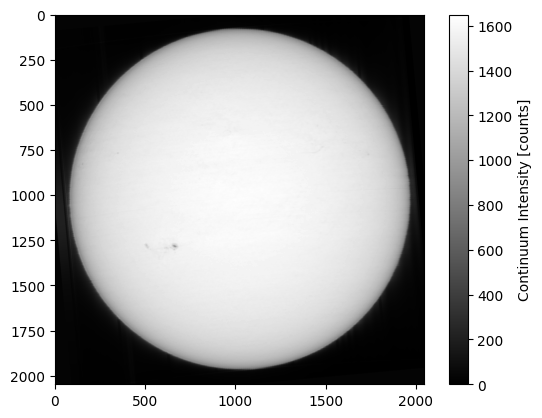

In [99]:
# Extract the second 2D plane from your data (Continuum Intensity)
plane2 = data[1, :, :]  # Shape (2048, 2048)

# Plot the second plane
plt.imshow(plane2, cmap='gray')
plt.colorbar(label='Continuum Intensity [counts]')
plt.show()

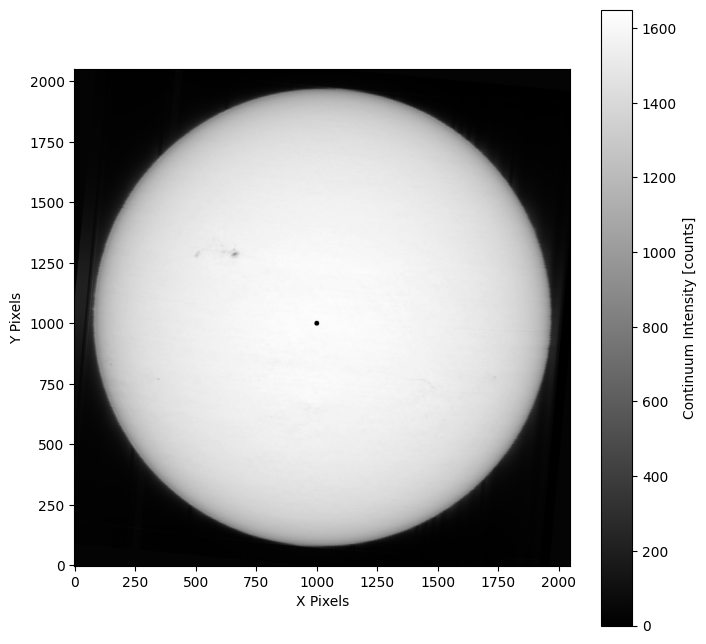

In [100]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Step 1: Open the FITS file and extract the data
file_path = '18:07:13.fts'
with fits.open(file_path) as hdul:
    data = hdul[0].data  # Extract the 3D data array

# Step 2: Extract the second plane (Continuum Intensity)
plane2 = data[1, :, :]  # Continuum Intensity (2D array)

# Step 3: Define the dot position and radius
dot_position = (1000, 1000)  # (y, x) position of the dot
dot_radius = 10  # Radius of the dot

# Create a grid of pixel coordinates
ny, nx = plane2.shape
y_grid, x_grid = np.ogrid[:ny, :nx]

# Calculate the distance of each pixel from the dot position
distance_from_center = np.sqrt((x_grid - dot_position[1])**2 + (y_grid - dot_position[0])**2)

# Create a circular mask for the dot and set those pixels to 0 (black)
mask = distance_from_center <= dot_radius
plane2[mask] = 0

# Step 4: Plot the modified image with the circular black dot
plt.figure(figsize=(8, 8))
plt.imshow(plane2, cmap='gray', origin='lower')
plt.colorbar(label='Continuum Intensity [counts]')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.show()

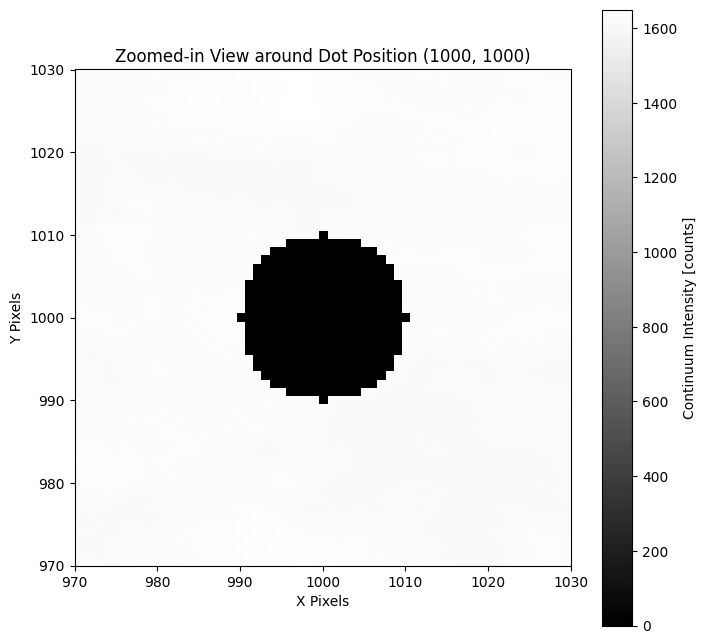

In [101]:
# Step 5: Define a zoom window size around the dot
zoom_size = int(dot_radius * 3)  # Adjust the multiplier to expand the view around the dot

# Calculate the bounding box for zoom (ensuring bounds are within the image dimensions)
y_min = max(0, dot_position[0] - zoom_size)
y_max = min(ny, dot_position[0] + zoom_size)
x_min = max(0, dot_position[1] - zoom_size)
x_max = min(nx, dot_position[1] + zoom_size)

# Step 6: Plot the zoomed-in modified image with the circular black dot
plt.figure(figsize=(8, 8))
plt.imshow(plane2, cmap='gray', origin='lower')
plt.colorbar(label='Continuum Intensity [counts]')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')

# Set plot limits to zoom in on the dot
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.title(f"Zoomed-in View around Dot Position {dot_position}")
plt.show()

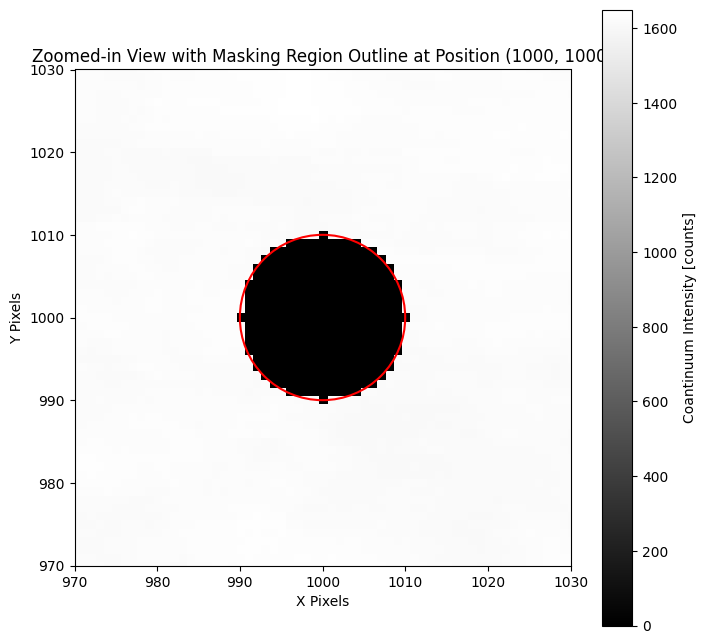

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib.patches import Circle

# Step 1: Open the FITS file and extract the data
file_path = '18:07:13.fts'
with fits.open(file_path) as hdul:
    data = hdul[0].data  # Extract the 3D data array

# Step 2: Extract the second plane (Continuum Intensity)
plane2 = data[1, :, :]  # Continuum Intensity (2D array)

# Step 3: Define the dot position and radius
dot_position = (1000, 1000)  # (y, x) position of the dot
dot_radius = 10  # Radius of the dot

# Create a grid of pixel coordinates
ny, nx = plane2.shape
y_grid, x_grid = np.ogrid[:ny, :nx]

# Calculate the distance of each pixel from the dot position
distance_from_center = np.sqrt((x_grid - dot_position[1])**2 + (y_grid - dot_position[0])**2)

# Create a circular mask for the dot and set those pixels to 0 (black)
mask = distance_from_center <= dot_radius
plane2[mask] = 0

# Step 4: Plot the modified image with the circular black dot and outline
plt.figure(figsize=(8, 8))
plt.imshow(plane2, cmap='gray', origin='lower')
plt.colorbar(label='Coantinuum Intensity [counts]')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')

# Add a circular outline for the masked region
circle_outline = Circle((dot_position[1], dot_position[0]), dot_radius, color='red', fill=False, linewidth=1.5)
plt.gca().add_patch(circle_outline)  # Add the circle to the current axes

# Optionally, zoom in to see the dot and outline clearly
zoom_size = int(dot_radius * 3)
plt.xlim(dot_position[1] - zoom_size, dot_position[1] + zoom_size)
plt.ylim(dot_position[0] - zoom_size, dot_position[0] + zoom_size)

plt.title(f"Zoomed-in View with Masking Region Outline at Position {dot_position}")
plt.show()


In [103]:
import numpy as np

# Define the radius of the circle
dot_radius = 10  # Example radius in pixels

# Calculate the exact area of the circle
circle_area_exact = np.pi * (dot_radius ** 2)
print(f"Exact Circle Area: {circle_area_exact:.2f} square pixels")

# Define the center position of the circle on the grid
dot_position = (50, 50)  # (y, x) coordinates of the circle center on a grid

# Create a grid of pixel coordinates
grid_size = 2 * dot_radius + 1  # Grid size large enough to contain the circle
y_grid, x_grid = np.ogrid[:grid_size, :grid_size]

# Calculate the distance of each pixel from the circle center
distance_from_center = np.sqrt((x_grid - dot_radius)**2 + (y_grid - dot_radius)**2)

# Create a mask for pixels within the circle radius
pixel_mask = distance_from_center <= dot_radius

# Calculate the area covered by pixels inside the circle (approximate area)
pixel_area = pixel_mask.sum()  # Counts the number of pixels within the circle

ratio = pixel_area / circle_area_exact

print(f"Approximate Pixel Area (counting pixels within the circle): {pixel_area} square pixels")
print('Ratio(pixel to circle):',ratio)

# Assuming square pixels, each with area of 1 square pixel, the total area is the count of pixels in the mask.


Exact Circle Area: 314.16 square pixels
Approximate Pixel Area (counting pixels within the circle): 317 square pixels
Ratio(pixel to circle): 1.0090423392026164


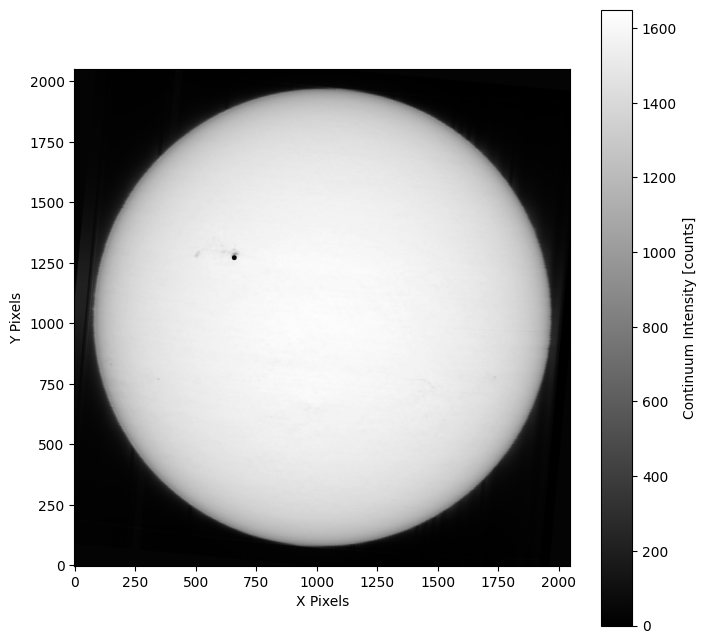

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Step 1: Open the FITS file and extract the data
file_path = '18:07:13.fts'
with fits.open(file_path) as hdul:
    data = hdul[0].data  # Extract the 3D data array

# Step 2: Extract the second plane (Continuum Intensity)
plane2 = data[1, :, :]  # Continuum Intensity (2D array)

# Step 3: Define the dot position and radius
dot_position = (1270, 660)  # (y, x) position of the dot
dot_radius = 10  # Radius of the dot

# Create a grid of pixel coordinates
ny, nx = plane2.shape
y_grid, x_grid = np.ogrid[:ny, :nx]

# Calculate the distance of each pixel from the dot position
distance_from_center = np.sqrt((x_grid - dot_position[1])**2 + (y_grid - dot_position[0])**2)

# Create a circular mask for the dot and set those pixels to 0 (black)
mask = distance_from_center <= dot_radius
plane2[mask] = 0

# Step 4: Plot the modified image with the circular black dot
plt.figure(figsize=(8, 8))
plt.imshow(plane2, cmap='gray', origin='lower')
plt.colorbar(label='Continuum Intensity [counts]')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.show()

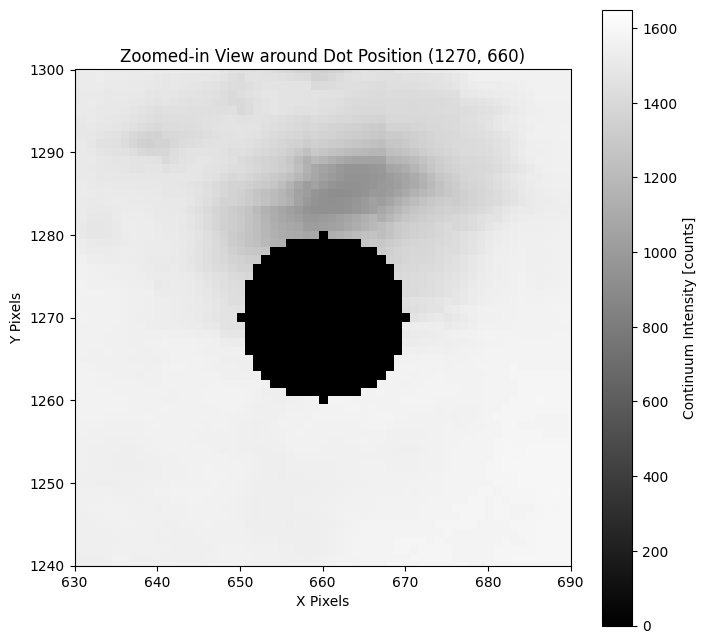

In [105]:
# Step 5: Define a zoom window size around the dot
zoom_size = int(dot_radius * 3)  # Adjust the multiplier to expand the view around the dot

# Calculate the bounding box for zoom (ensuring bounds are within the image dimensions)
y_min = max(0, dot_position[0] - zoom_size)
y_max = min(ny, dot_position[0] + zoom_size)
x_min = max(0, dot_position[1] - zoom_size)
x_max = min(nx, dot_position[1] + zoom_size)

# Step 6: Plot the zoomed-in modified image with the circular black dot
plt.figure(figsize=(8, 8))
plt.imshow(plane2, cmap='gray', origin='lower')
plt.colorbar(label='Continuum Intensity [counts]')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')

# Set plot limits to zoom in on the dot
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.title(f"Zoomed-in View around Dot Position {dot_position}")
plt.show()

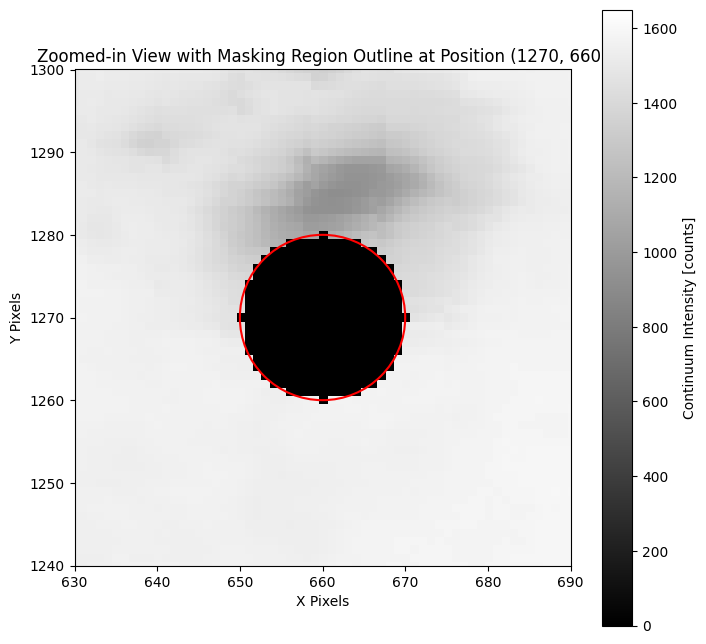

In [106]:
# Step 4: Plot the modified image with the circular black dot and outline
plt.figure(figsize=(8, 8))
plt.imshow(plane2, cmap='gray', origin='lower')
plt.colorbar(label='Continuum Intensity [counts]')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')

# Add a circular outline for the masked region
circle_outline = Circle((dot_position[1], dot_position[0]), dot_radius, color='red', fill=False, linewidth=1.5)
plt.gca().add_patch(circle_outline)  # Add the circle to the current axes

# Optionally, zoom in to see the dot and outline clearly
zoom_size = int(dot_radius * 3)
plt.xlim(dot_position[1] - zoom_size, dot_position[1] + zoom_size)
plt.ylim(dot_position[0] - zoom_size, dot_position[0] + zoom_size)

plt.title(f"Zoomed-in View with Masking Region Outline at Position {dot_position}")
plt.show()


In [107]:
import numpy as np

# Define the radius of the circle
dot_radius = 10  # Example radius in pixels

# Calculate the exact area of the circle
circle_area_exact = np.pi * (dot_radius ** 2)
print(f"Exact Circle Area: {circle_area_exact:.2f} square pixels")

# Define the center position of the circle on the grid
dot_position = (50, 50)  # (y, x) coordinates of the circle center on a grid

# Create a grid of pixel coordinates
grid_size = 2 * dot_radius + 1  # Grid size large enough to contain the circle
y_grid, x_grid = np.ogrid[:grid_size, :grid_size]

# Calculate the distance of each pixel from the circle center
distance_from_center = np.sqrt((x_grid - dot_radius)**2 + (y_grid - dot_radius)**2)

# Create a mask for pixels within the circle radius
pixel_mask = distance_from_center <= dot_radius

# Calculate the area covered by pixels inside the circle (approximate area)
pixel_area = pixel_mask.sum()  # Counts the number of pixels within the circle

ratio = pixel_area / circle_area_exact

print(f"Approximate Pixel Area (counting pixels within the circle): {pixel_area} square pixels")
print('Ratio(pixel to circle):',ratio)

# Assuming square pixels, each with area of 1 square pixel, the total area is the count of pixels in the mask.


Exact Circle Area: 314.16 square pixels
Approximate Pixel Area (counting pixels within the circle): 317 square pixels
Ratio(pixel to circle): 1.0090423392026164


Guassian Filter

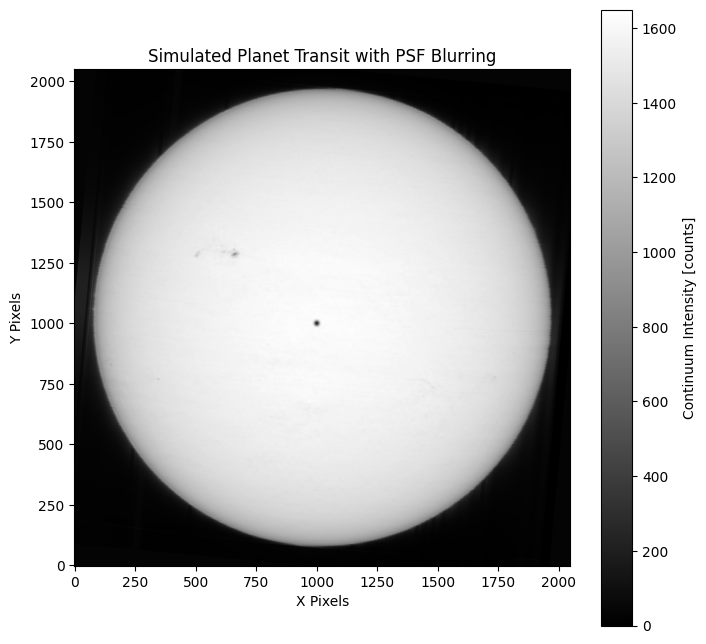

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from astropy.io import fits

# Step 1: Load the FITS image data (replace with your actual file)
file_path = '18:07:13.fts'
with fits.open(file_path) as hdul:
    data = hdul[0].data  # Extract the data array

# Step 2: Extract the plane (e.g., continuum intensity)
plane2 = data[1, :, :]  # Continuum Intensity (2D array)

# Define the center and radius of the planet (dot)
dot_position = (1000, 1000)  # (y, x) position of the planet
dot_radius = 10  # Radius of the planet in pixels

# Step 3: Create the planet mask (binary mask representing the planet)
ny, nx = plane2.shape
y_grid, x_grid = np.ogrid[:ny, :nx]
distance_from_center = np.sqrt((x_grid - dot_position[1])**2 + (y_grid - dot_position[0])**2)
planet_mask = distance_from_center <= dot_radius

# Step 4: Apply Gaussian PSF (convolution) to blur the planet mask
# Define the PSF sigma to control the degree of blurring
psf_sigma = dot_radius / 2  # Adjust based on the desired blur effect
blurred_planet_mask = gaussian_filter(planet_mask.astype(float), sigma=psf_sigma)

# Step 5: Invert the blurred planet mask to simulate light reduction during the transit
transit_mask = 1 - blurred_planet_mask

# Step 6: Apply the PSF-based transit mask to the image
plane2_with_transit = plane2 * transit_mask

# Step 7: Plot the image with the PSF-blurred simulated transit
plt.figure(figsize=(8, 8))
plt.imshow(plane2_with_transit, cmap='gray', origin='lower')
plt.colorbar(label='Continuum Intensity [counts]')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.title("Simulated Planet Transit with PSF Blurring")
plt.show()


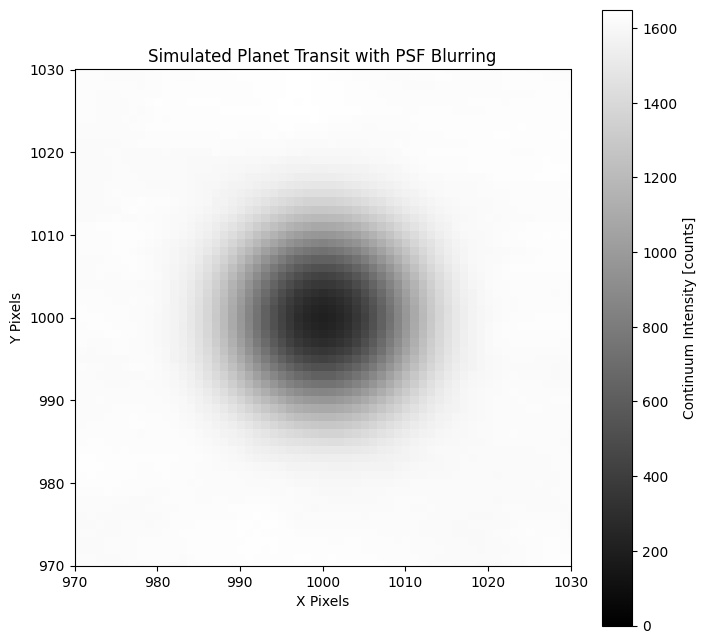

In [109]:
# Step 7: Plot the image with the PSF-blurred simulated transit
plt.figure(figsize=(8, 8))
plt.imshow(plane2_with_transit, cmap='gray', origin='lower')
plt.colorbar(label='Continuum Intensity [counts]')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.xlim(970, 1030)
plt.ylim(970, 1030)
plt.title("Simulated Planet Transit with PSF Blurring")
plt.show()

Sub-Pixel

Effective Area Covered by Sub-Pixel Mask: 313.80 square pixels


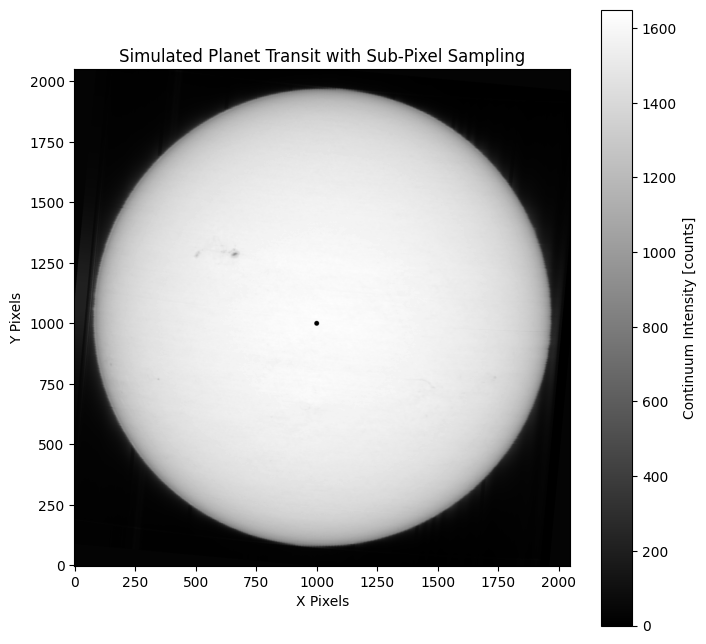

In [119]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Step 1: Load the FITS image data (replace with your actual file)
file_path = '18:07:13.fts'
with fits.open(file_path) as hdul:
    data = hdul[0].data  # Extract the data array

# Step 2: Extract the plane (e.g., continuum intensity)
plane2 = data[1, :, :]  # Continuum Intensity (2D array)

# Define the center and radius of the planet (dot)
dot_position = (1000, 1000)  # (y, x) position of the planet
dot_radius = 10  # Radius of the planet in pixels
sampling_factor = 5  # Define the sub-pixel sampling rate (e.g., 5x original resolution)

# Step 3: Create a high-resolution grid for sub-pixel sampling
ny, nx = plane2.shape
high_res_ny, high_res_nx = ny * sampling_factor, nx * sampling_factor

# Define high-resolution coordinates centered on the dot position
y_high_res, x_high_res = np.ogrid[:high_res_ny, :high_res_nx]
y_high_res_center = dot_position[0] * sampling_factor
x_high_res_center = dot_position[1] * sampling_factor

# Calculate the high-resolution distance from the center
distance_from_center_high_res = np.sqrt((x_high_res - x_high_res_center)**2 + (y_high_res - y_high_res_center)**2)

# Step 4: Create a high-resolution binary mask for the circle
high_res_mask = distance_from_center_high_res <= (dot_radius * sampling_factor)

# Step 5: Downsample by averaging blocks of sub-pixels within each original pixel
# Reshape and average over sampling_factor x sampling_factor blocks
downsampled_mask = high_res_mask.reshape(ny, sampling_factor, nx, sampling_factor).mean(axis=(1, 3))

# Step 6: Apply the sub-pixel sampled mask to the image
plane2_with_transit = plane2 * (1 - downsampled_mask)

# Step 7: Calculate the effective area covered by the downsampled mask
effective_area = downsampled_mask.sum()
print(f"Effective Area Covered by Sub-Pixel Mask: {effective_area:.2f} square pixels")

# Step 8: Plot the image with the sub-pixel sampled transit mask
plt.figure(figsize=(8, 8))
plt.imshow(plane2_with_transit, cmap='gray', origin='lower')
plt.colorbar(label='Continuum Intensity [counts]')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.title("Simulated Planet Transit with Sub-Pixel Sampling")
plt.show()


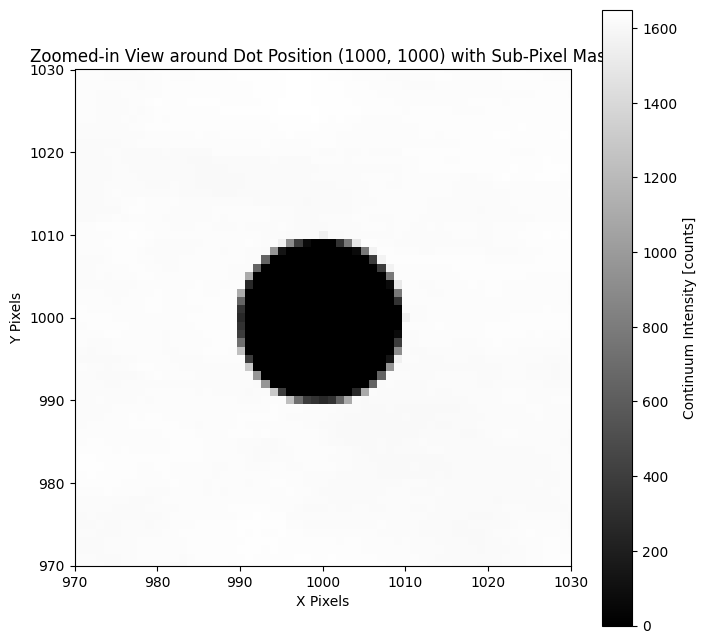

In [122]:
# Step 8: Define a zoom window size around the dot
zoom_size = int(dot_radius * 3)  # Adjust the multiplier to expand the view around the dot

# Calculate the bounding box for zoom (ensuring bounds are within the image dimensions)
y_min = max(0, dot_position[0] - zoom_size)
y_max = min(ny, dot_position[0] + zoom_size)
x_min = max(0, dot_position[1] - zoom_size)
x_max = min(nx, dot_position[1] + zoom_size)

# Step 9: Plot the zoomed-in modified image with the circular black dot
plt.figure(figsize=(8, 8))
plt.imshow(plane2_with_transit, cmap='gray', origin='lower')
plt.colorbar(label='Continuum Intensity [counts]')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')

# Set plot limits to zoom in on the dot
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.title(f"Zoomed-in View around Dot Position {dot_position} with Sub-Pixel Mask")
plt.show()

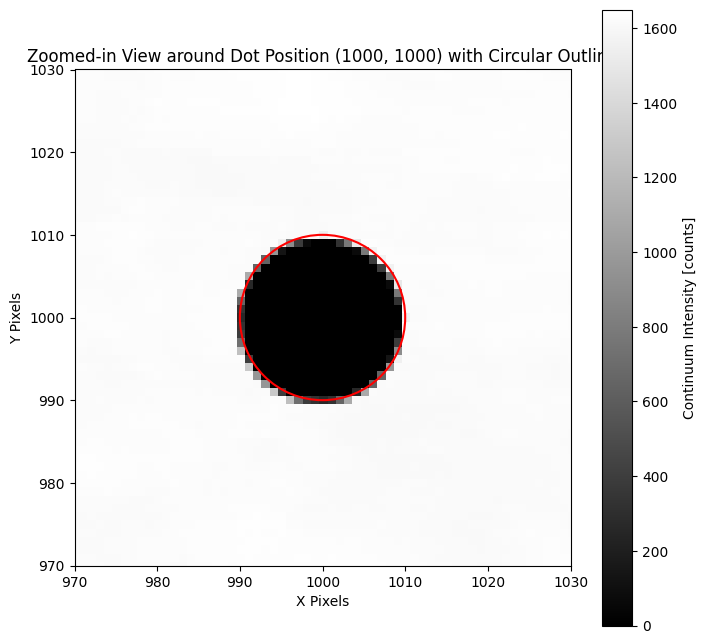

In [124]:
# Step 9: Plot the zoomed-in modified image with the circular black dot and outline
plt.figure(figsize=(8, 8))
plt.imshow(plane2_with_transit, cmap='gray', origin='lower')
plt.colorbar(label='Continuum Intensity [counts]')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')

# Add a circular outline to indicate the planet's radius
circle_outline = Circle((dot_position[1], dot_position[0]), dot_radius, color='red', fill=False, linewidth=1.5)
plt.gca().add_patch(circle_outline)  # Add the circle to the current axes

# Set plot limits to zoom in on the dot
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.title(f"Zoomed-in View around Dot Position {dot_position} with Circular Outline")
plt.show()

Effective Area Covered by Sub-Pixel Mask: 313.80 square pixels
Theoretical Circle Area: 314.16 square pixels
Ratio of Pixel Area to Circle Area: 0.9989


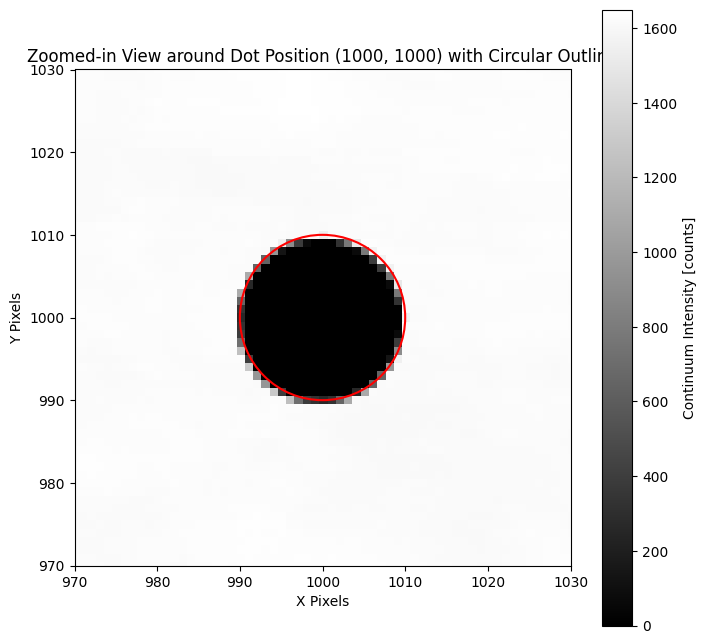

In [125]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
from astropy.io import fits

# Step 1: Load the FITS image data (replace with your actual file)
file_path = '18:07:13.fts'
with fits.open(file_path) as hdul:
    data = hdul[0].data  # Extract the data array

# Step 2: Extract the plane (e.g., continuum intensity)
plane2 = data[1, :, :]  # Continuum Intensity (2D array)

# Define the center and radius of the planet (dot)
dot_position = (1000, 1000)  # (y, x) position of the planet
dot_radius = 10  # Radius of the planet in pixels
sampling_factor = 5  # Define the sub-pixel sampling rate (e.g., 5x original resolution)

# Step 3: Create a high-resolution grid for sub-pixel sampling
ny, nx = plane2.shape
high_res_ny, high_res_nx = ny * sampling_factor, nx * sampling_factor

# Define high-resolution coordinates centered on the dot position
y_high_res, x_high_res = np.ogrid[:high_res_ny, :high_res_nx]
y_high_res_center = dot_position[0] * sampling_factor
x_high_res_center = dot_position[1] * sampling_factor

# Calculate the high-resolution distance from the center
distance_from_center_high_res = np.sqrt((x_high_res - x_high_res_center)**2 + (y_high_res - y_high_res_center)**2)

# Step 4: Create a high-resolution binary mask for the circle
high_res_mask = distance_from_center_high_res <= (dot_radius * sampling_factor)

# Step 5: Downsample by averaging blocks of sub-pixels within each original pixel
# Reshape and average over sampling_factor x sampling_factor blocks
downsampled_mask = high_res_mask.reshape(ny, sampling_factor, nx, sampling_factor).mean(axis=(1, 3))

# Step 6: Apply the sub-pixel sampled mask to the image
plane2_with_transit = plane2 * (1 - downsampled_mask)

# Step 7: Calculate the effective area covered by the downsampled mask
effective_area = downsampled_mask.sum()

# Step 8: Calculate the theoretical area of the circle
theoretical_circle_area = np.pi * (dot_radius ** 2)

# Step 9: Calculate the ratio of pixel area to circle area
area_ratio = effective_area / theoretical_circle_area
print(f"Effective Area Covered by Sub-Pixel Mask: {effective_area:.2f} square pixels")
print(f"Theoretical Circle Area: {theoretical_circle_area:.2f} square pixels")
print(f"Ratio of Pixel Area to Circle Area: {area_ratio:.4f}")

# Step 10: Plot the zoomed-in modified image with the circular black dot and outline
plt.figure(figsize=(8, 8))
plt.imshow(plane2_with_transit, cmap='gray', origin='lower')
plt.colorbar(label='Continuum Intensity [counts]')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')

# Add a circular outline to indicate the planet's radius
circle_outline = Circle((dot_position[1], dot_position[0]), dot_radius, color='red', fill=False, linewidth=1.5)
plt.gca().add_patch(circle_outline)  # Add the circle to the current axes

# Define a zoom window size around the dot
zoom_size = int(dot_radius * 3)  # Adjust the multiplier to expand the view around the dot

# Set plot limits to zoom in on the dot
plt.xlim(dot_position[1] - zoom_size, dot_position[1] + zoom_size)
plt.ylim(dot_position[0] - zoom_size, dot_position[0] + zoom_size)

plt.title(f"Zoomed-in View around Dot Position {dot_position} with Circular Outline")
plt.show()


Soft-Edge

Effective Area Covered by Soft-Edge Mask: 646.47 square pixels


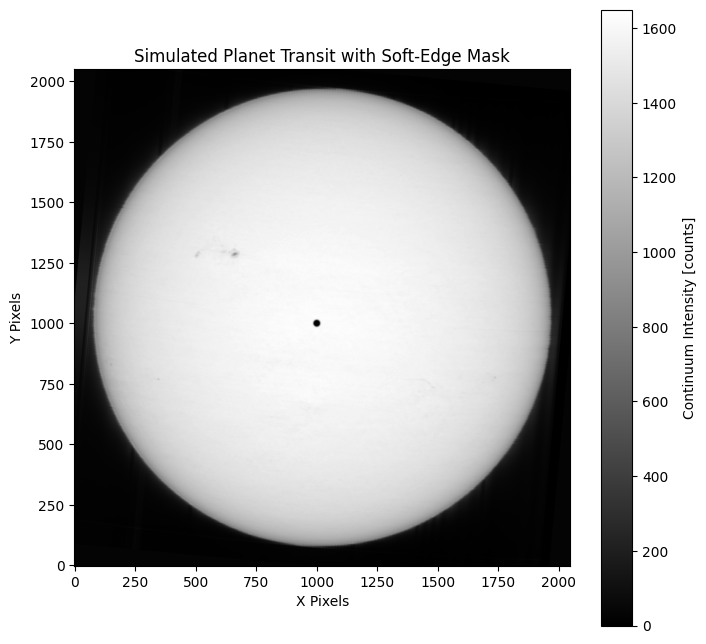

In [113]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from astropy.io import fits

# Step 1: Load the FITS image data (replace with your actual file)
file_path = '18:07:13.fts'
with fits.open(file_path) as hdul:
    data = hdul[0].data  # Extract the data array

# Step 2: Extract the plane (e.g., continuum intensity)
plane2 = data[1, :, :]  # Continuum Intensity (2D array)

# Define the center and radius of the planet (dot)
dot_position = (1000, 1000)  # (y, x) position of the planet
dot_radius = 10  # Radius of the planet in pixels

# Create a grid of coordinates
ny, nx = plane2.shape
y_grid, x_grid = np.ogrid[:ny, :nx]

# Step 3: Calculate the distance of each pixel from the planet center
distance_from_center = np.sqrt((x_grid - dot_position[1])**2 + (y_grid - dot_position[0])**2)

# Step 4: Define a soft-edge mask using a Gaussian profile
sigma = dot_radius / 3  # Controls softness of edge, adjust as needed
soft_edge_mask = np.exp(-0.5 * ((distance_from_center - dot_radius) / sigma) ** 2)
soft_edge_mask[distance_from_center <= dot_radius] = 1  # Inside the circle, fully opaque

# Step 5: Calculate the effective area covered by the soft-edge mask
effective_area = soft_edge_mask.sum()
print(f"Effective Area Covered by Soft-Edge Mask: {effective_area:.2f} square pixels")

# Step 6: Apply the soft-edge mask to simulate the planet's shadow
plane2_with_transit = plane2 * (1 - soft_edge_mask)

# Step 7: Plot the image with the soft-edge simulated transit
plt.figure(figsize=(8, 8))
plt.imshow(plane2_with_transit, cmap='gray', origin='lower')
plt.colorbar(label='Continuum Intensity [counts]')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.title("Simulated Planet Transit with Soft-Edge Mask")
plt.show()


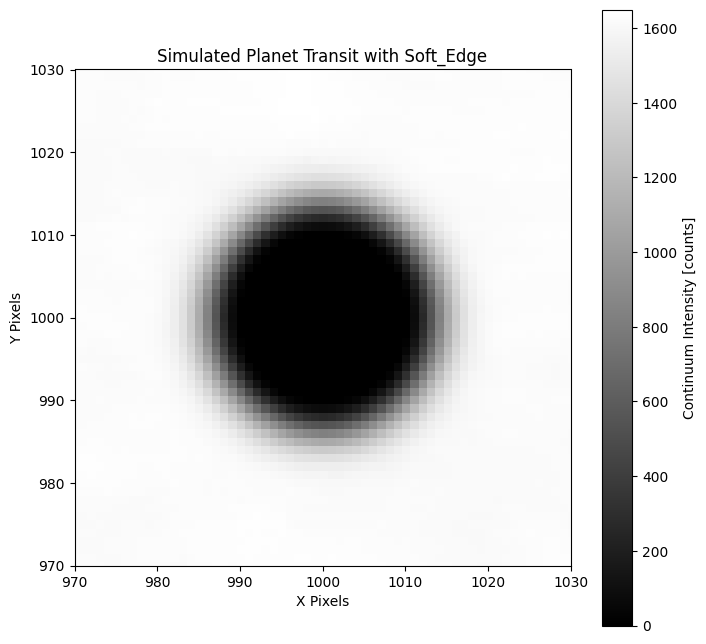

In [114]:
# Step 7: Plot the image with the PSF-blurred simulated transit
plt.figure(figsize=(8, 8))
plt.imshow(plane2_with_transit, cmap='gray', origin='lower')
plt.colorbar(label='Continuum Intensity [counts]')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.xlim(970, 1030)
plt.ylim(970, 1030)
plt.title("Simulated Planet Transit with Soft_Edge")
plt.show()

Effective Area Covered by Soft-Edge Mask: 646.47 square pixels


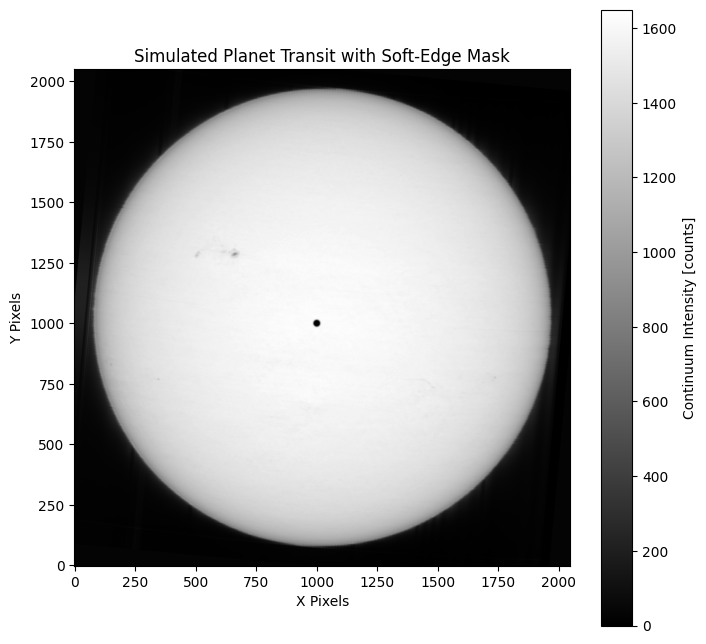

In [115]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from astropy.io import fits

# Step 1: Load the FITS image data (replace with your actual file)
file_path = '18:07:13.fts'
with fits.open(file_path) as hdul:
    data = hdul[0].data  # Extract the data array

# Step 2: Extract the plane (e.g., continuum intensity)
plane2 = data[1, :, :]  # Continuum Intensity (2D array)

# Define the center and radius of the planet (dot)
dot_position = (1000, 1000)  # (y, x) position of the planet
dot_radius = 10  # Radius of the planet in pixels

# Create a grid of coordinates
ny, nx = plane2.shape
y_grid, x_grid = np.ogrid[:ny, :nx]

# Step 3: Calculate the distance of each pixel from the planet center
distance_from_center = np.sqrt((x_grid - dot_position[1])**2 + (y_grid - dot_position[0])**2)

# Step 4: Define a soft-edge mask using a Gaussian profile
sigma = dot_radius / 3  # Controls softness of edge, adjust as needed
soft_edge_mask = np.exp(-0.5 * ((distance_from_center - dot_radius) / sigma) ** 2)
soft_edge_mask[distance_from_center <= dot_radius] = 1  # Inside the circle, fully opaque

# Step 5: Calculate the effective area covered by the soft-edge mask
effective_area = soft_edge_mask.sum()
print(f"Effective Area Covered by Soft-Edge Mask: {effective_area:.2f} square pixels")

# Step 6: Apply the soft-edge mask to simulate the planet's shadow
plane2_with_transit = plane2 * (1 - soft_edge_mask)

# Step 7: Plot the image with the soft-edge simulated transit
plt.figure(figsize=(8, 8))
plt.imshow(plane2_with_transit, cmap='gray', origin='lower')
plt.colorbar(label='Continuum Intensity [counts]')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.title("Simulated Planet Transit with Soft-Edge Mask")
plt.show()


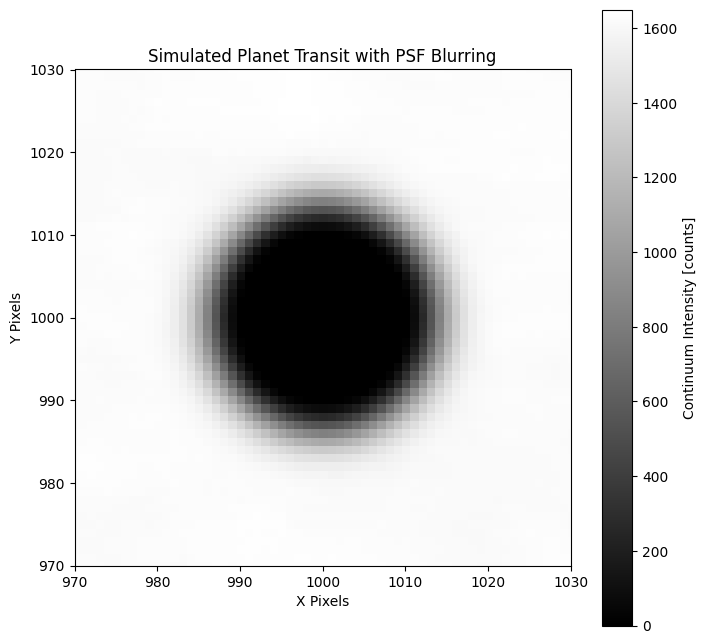

In [116]:
# Step 7: Plot the image with the PSF-blurred simulated transit
plt.figure(figsize=(8, 8))
plt.imshow(plane2_with_transit, cmap='gray', origin='lower')
plt.colorbar(label='Continuum Intensity [counts]')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.xlim(970, 1030)
plt.ylim(970, 1030)
plt.title("Simulated Planet Transit with PSF Blurring")
plt.show()

compare with the fitted model 

Prism, Tregloan-Read 2016 

Astropy's apph0t librar / aperture photometry 

Total flux of the Sun (Continuum Intensity): 3985132921.458425
Flux of the occulting object (Continuum Intensity): 12754872.220357193
Visible flux after occultation (Continuum Intensity): 3972378049.2380676
Normalized Flux Occulted: 0.3201%


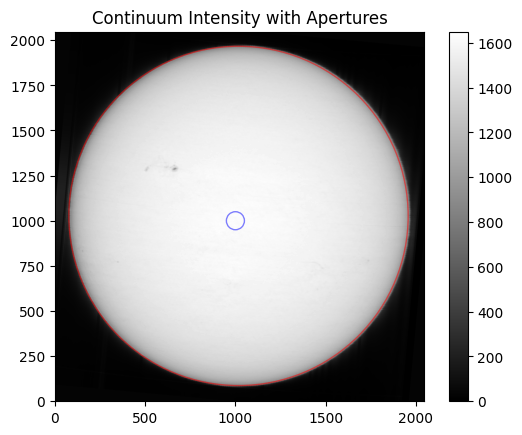

Estimate of Metres per Pixel: 740034.1829
Center: (1017.158111124163, 1026.6796076588746), Radius: 940.0917093405263
Integrated Flux of the Sun: 3985131008.0 counts
Integrated Flux of the Sun with Dot: 3972390400.0 counts


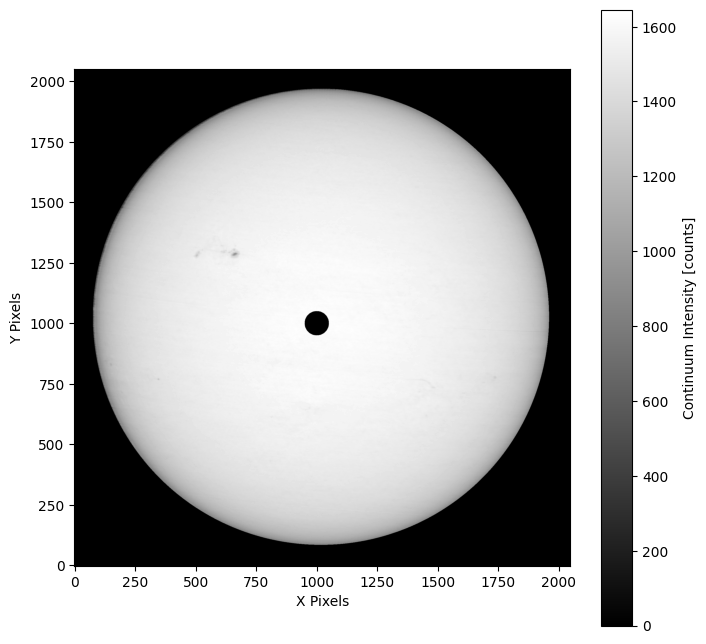

Quadratic Fit: u1=0.268, u2=0.121
Nonlinear Fit: u1=-3.384, u2=10.654, u3=-11.415, u3=4.269


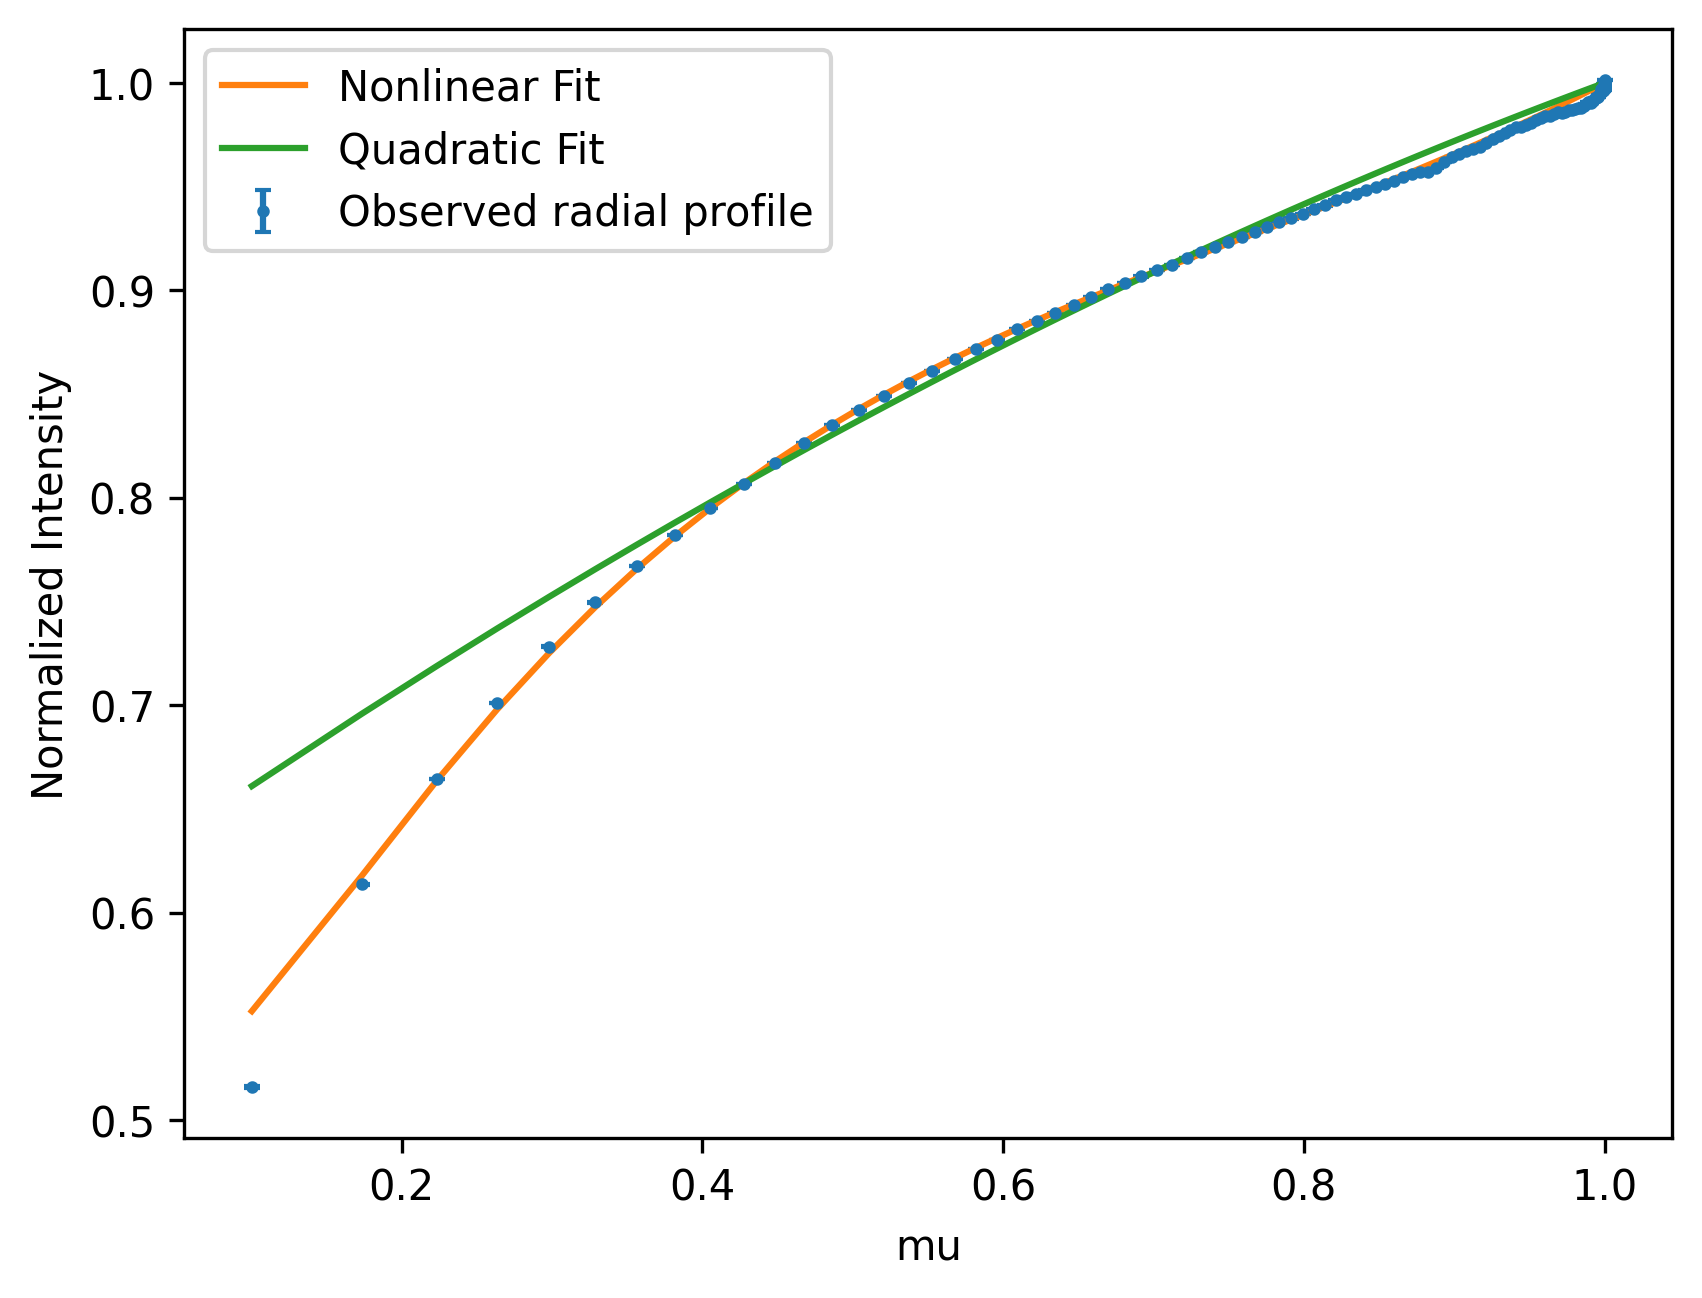

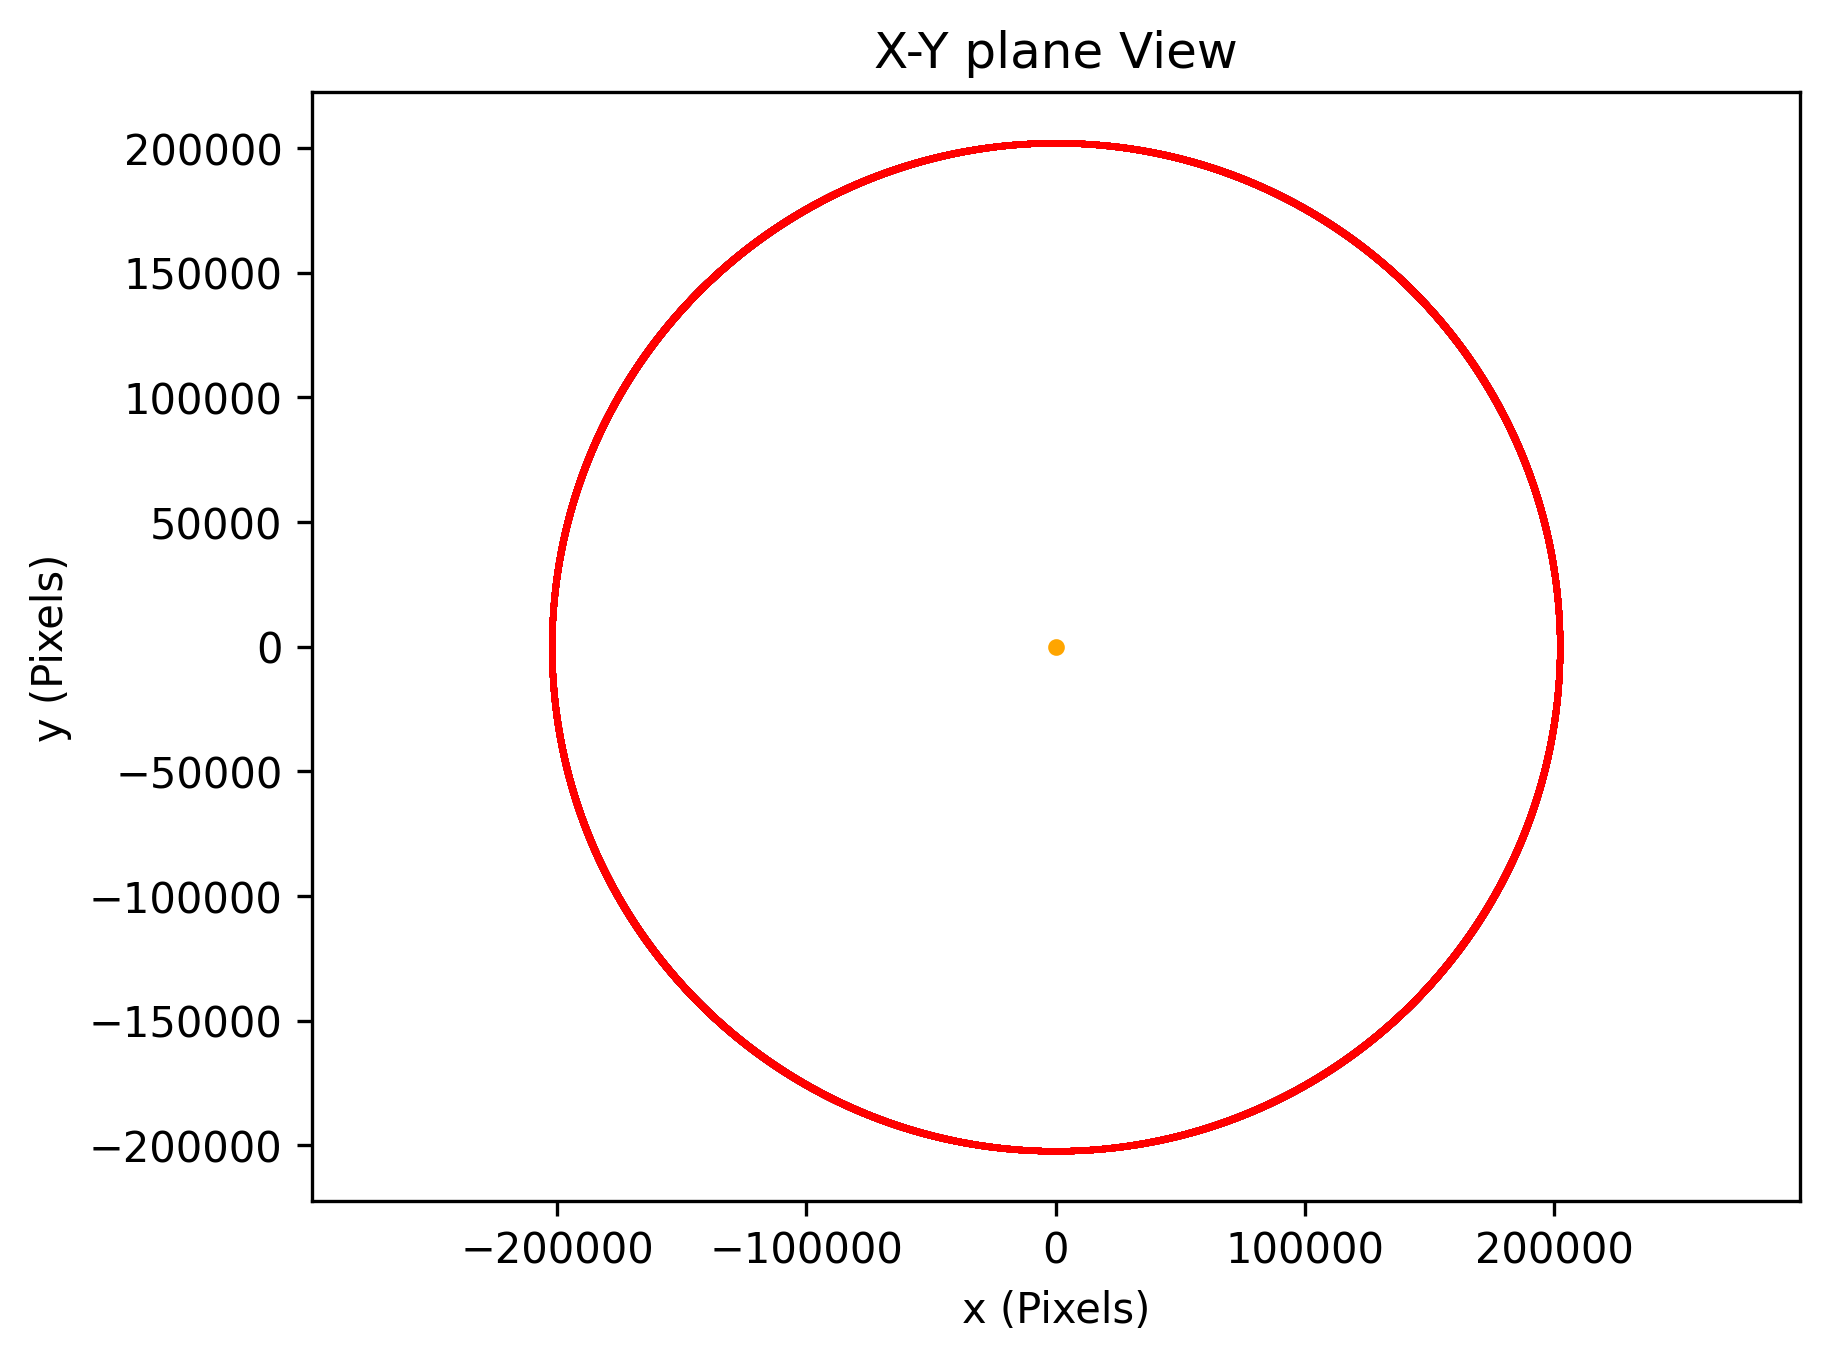

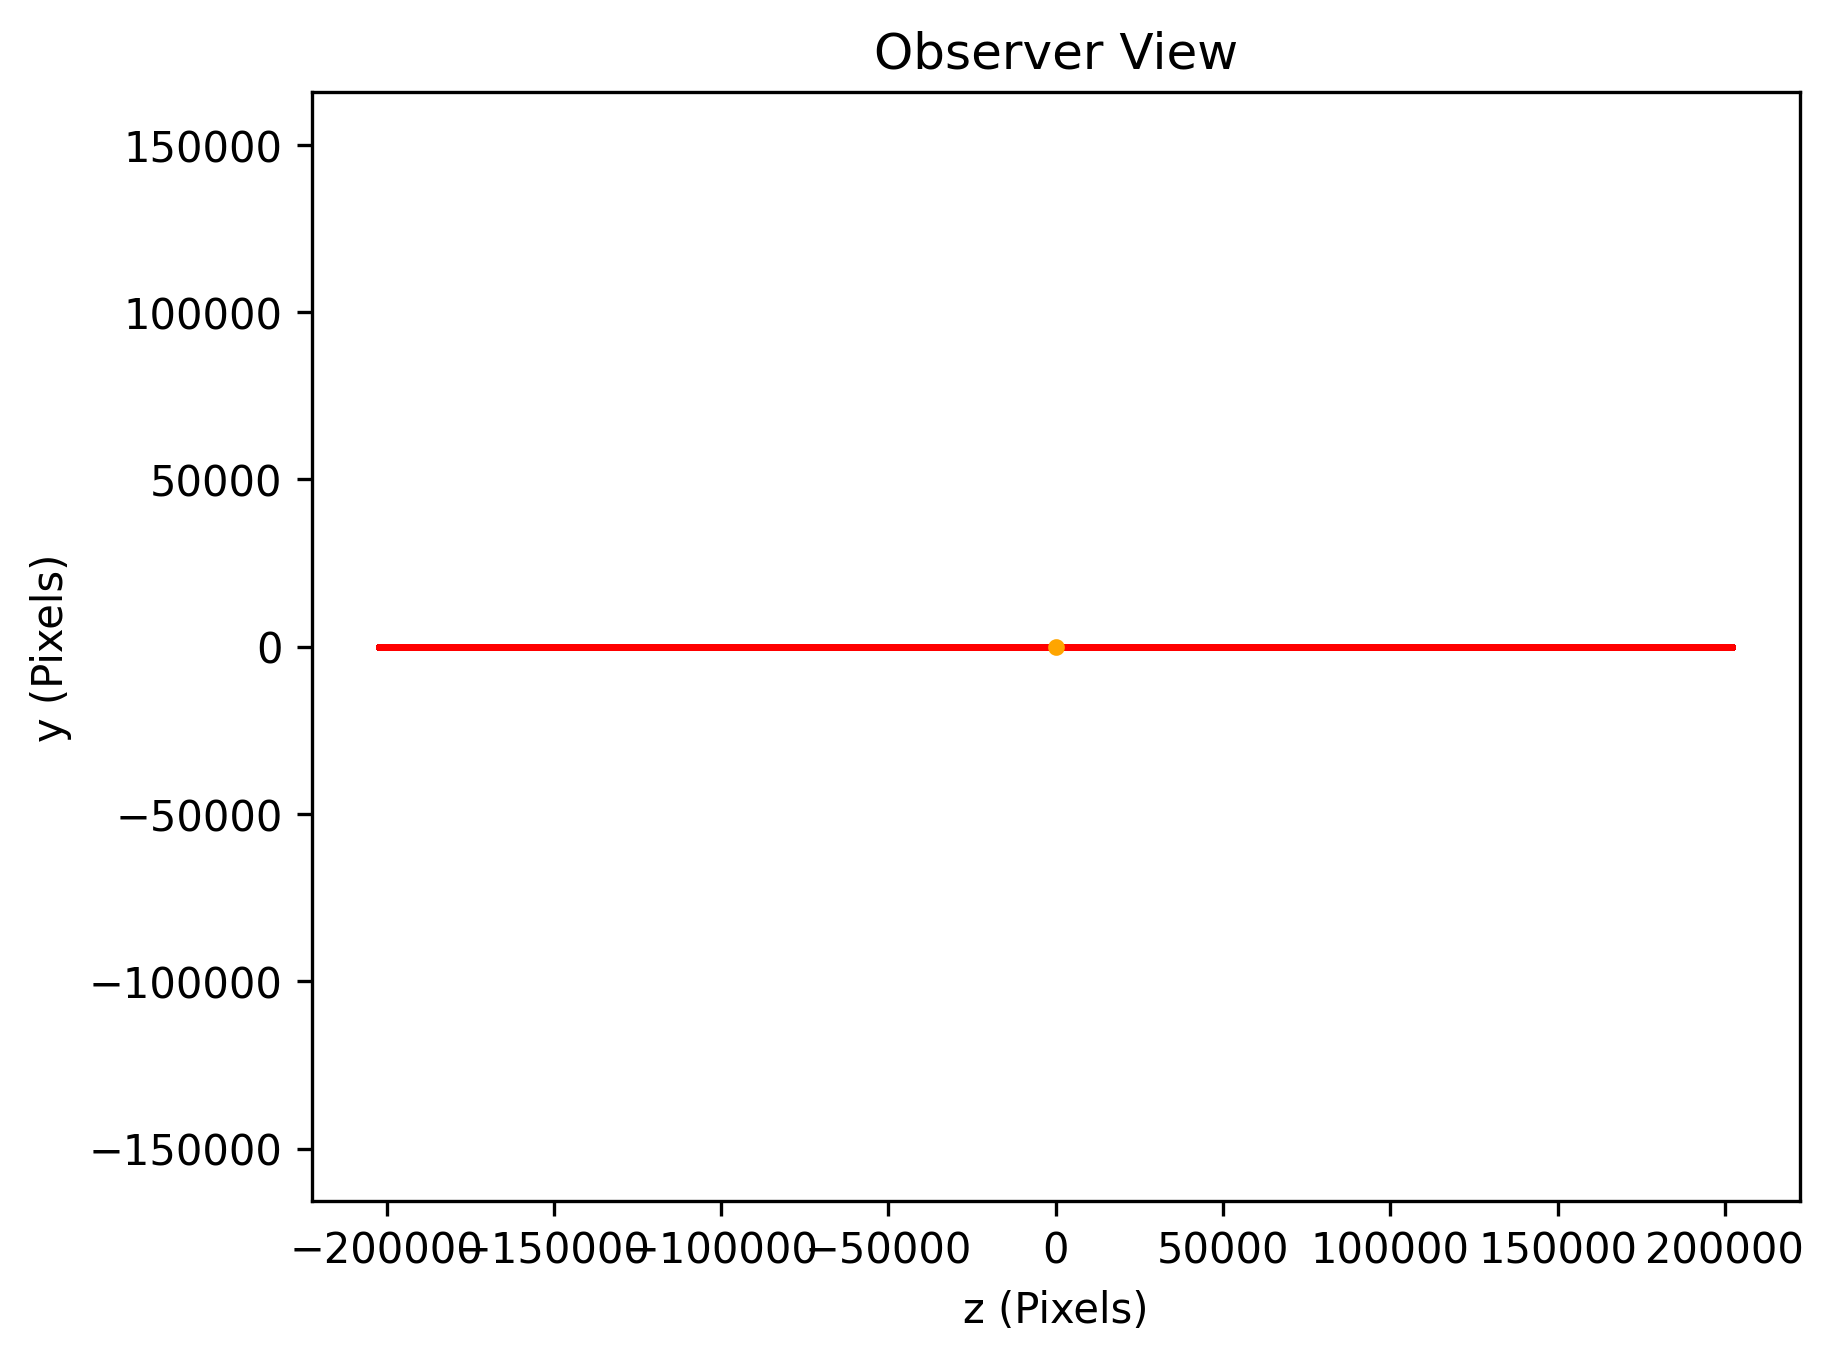

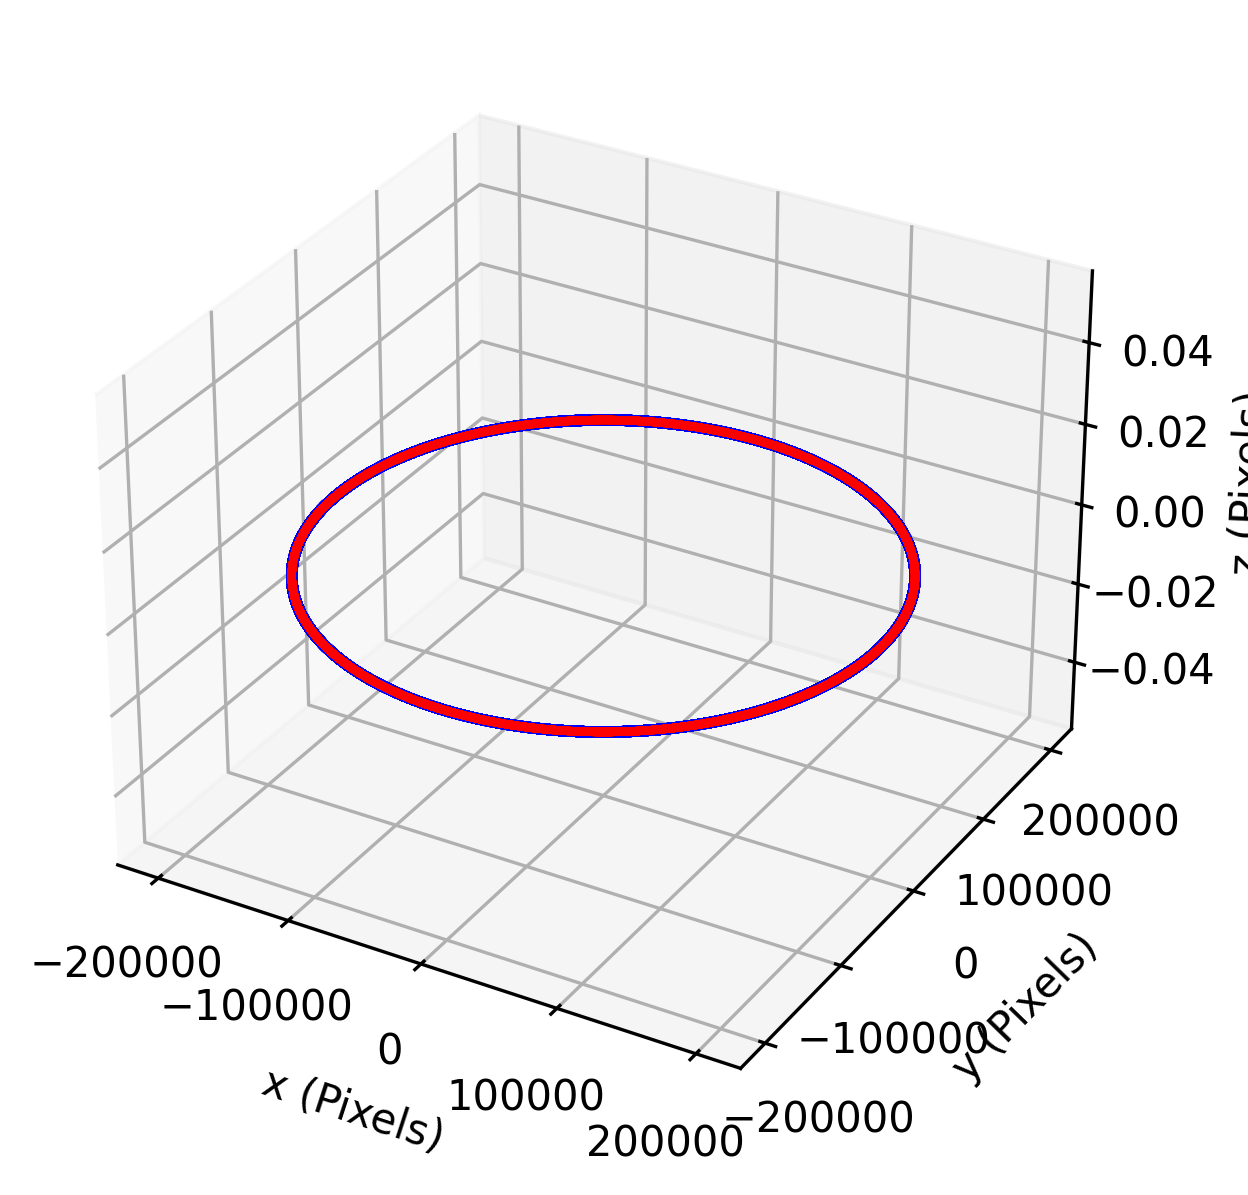

/var/folders/yh/4z776pd90v11fn23_ch0y_6m0000gn/T/ipykernel_35107/2898065553.py:384: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  first_quarter = df.iloc[:first_quarter_end_index][(df['y (Pixels)'] >= x_center) & (df['y (Pixels)'] < 2200)]
/var/folders/yh/4z776pd90v11fn23_ch0y_6m0000gn/T/ipykernel_35107/2898065553.py:385: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  last_quarter = df.iloc[last_quarter_start_index:][(df['y (Pixels)'] > -200) & (df['y (Pixels)'] <= x_center)]


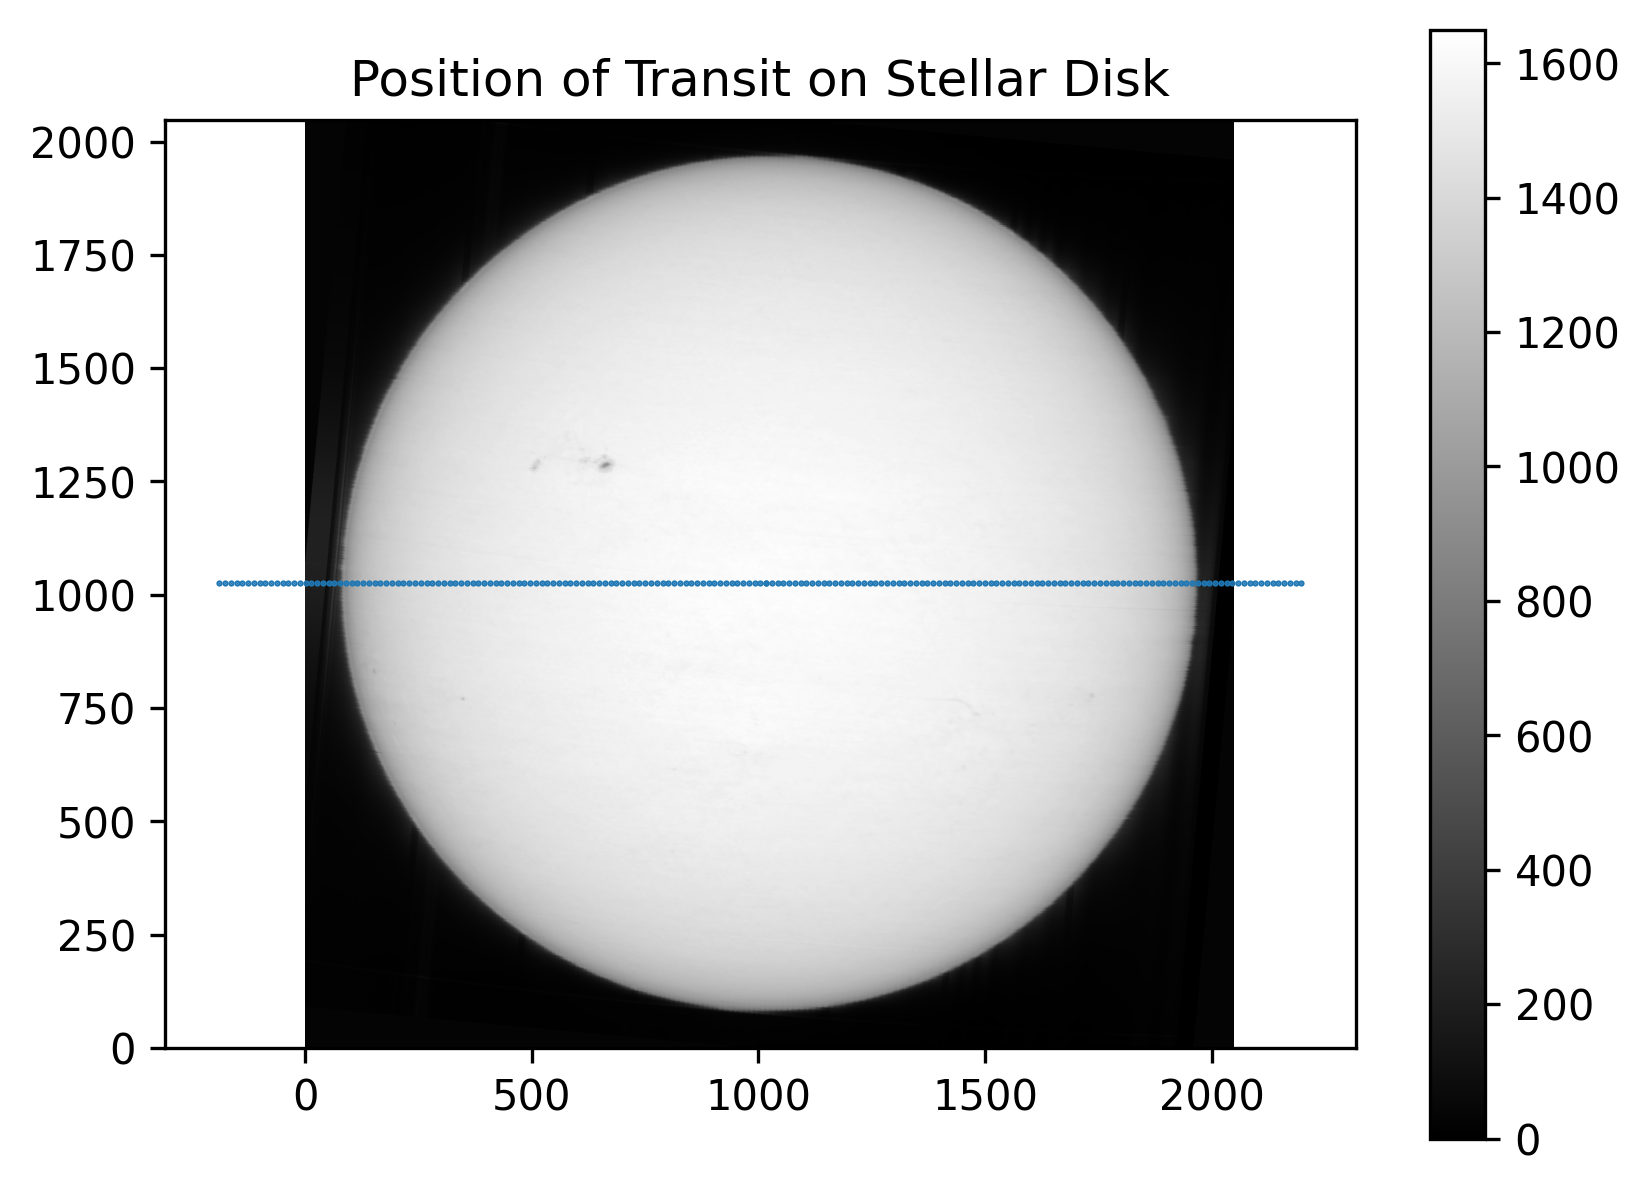

Original Rp /Rs: 0.053186300
Fitted Rp /Rs: 0.053191073
Transit Depth: 0.2829%
Limb Darkening Coefficients: 


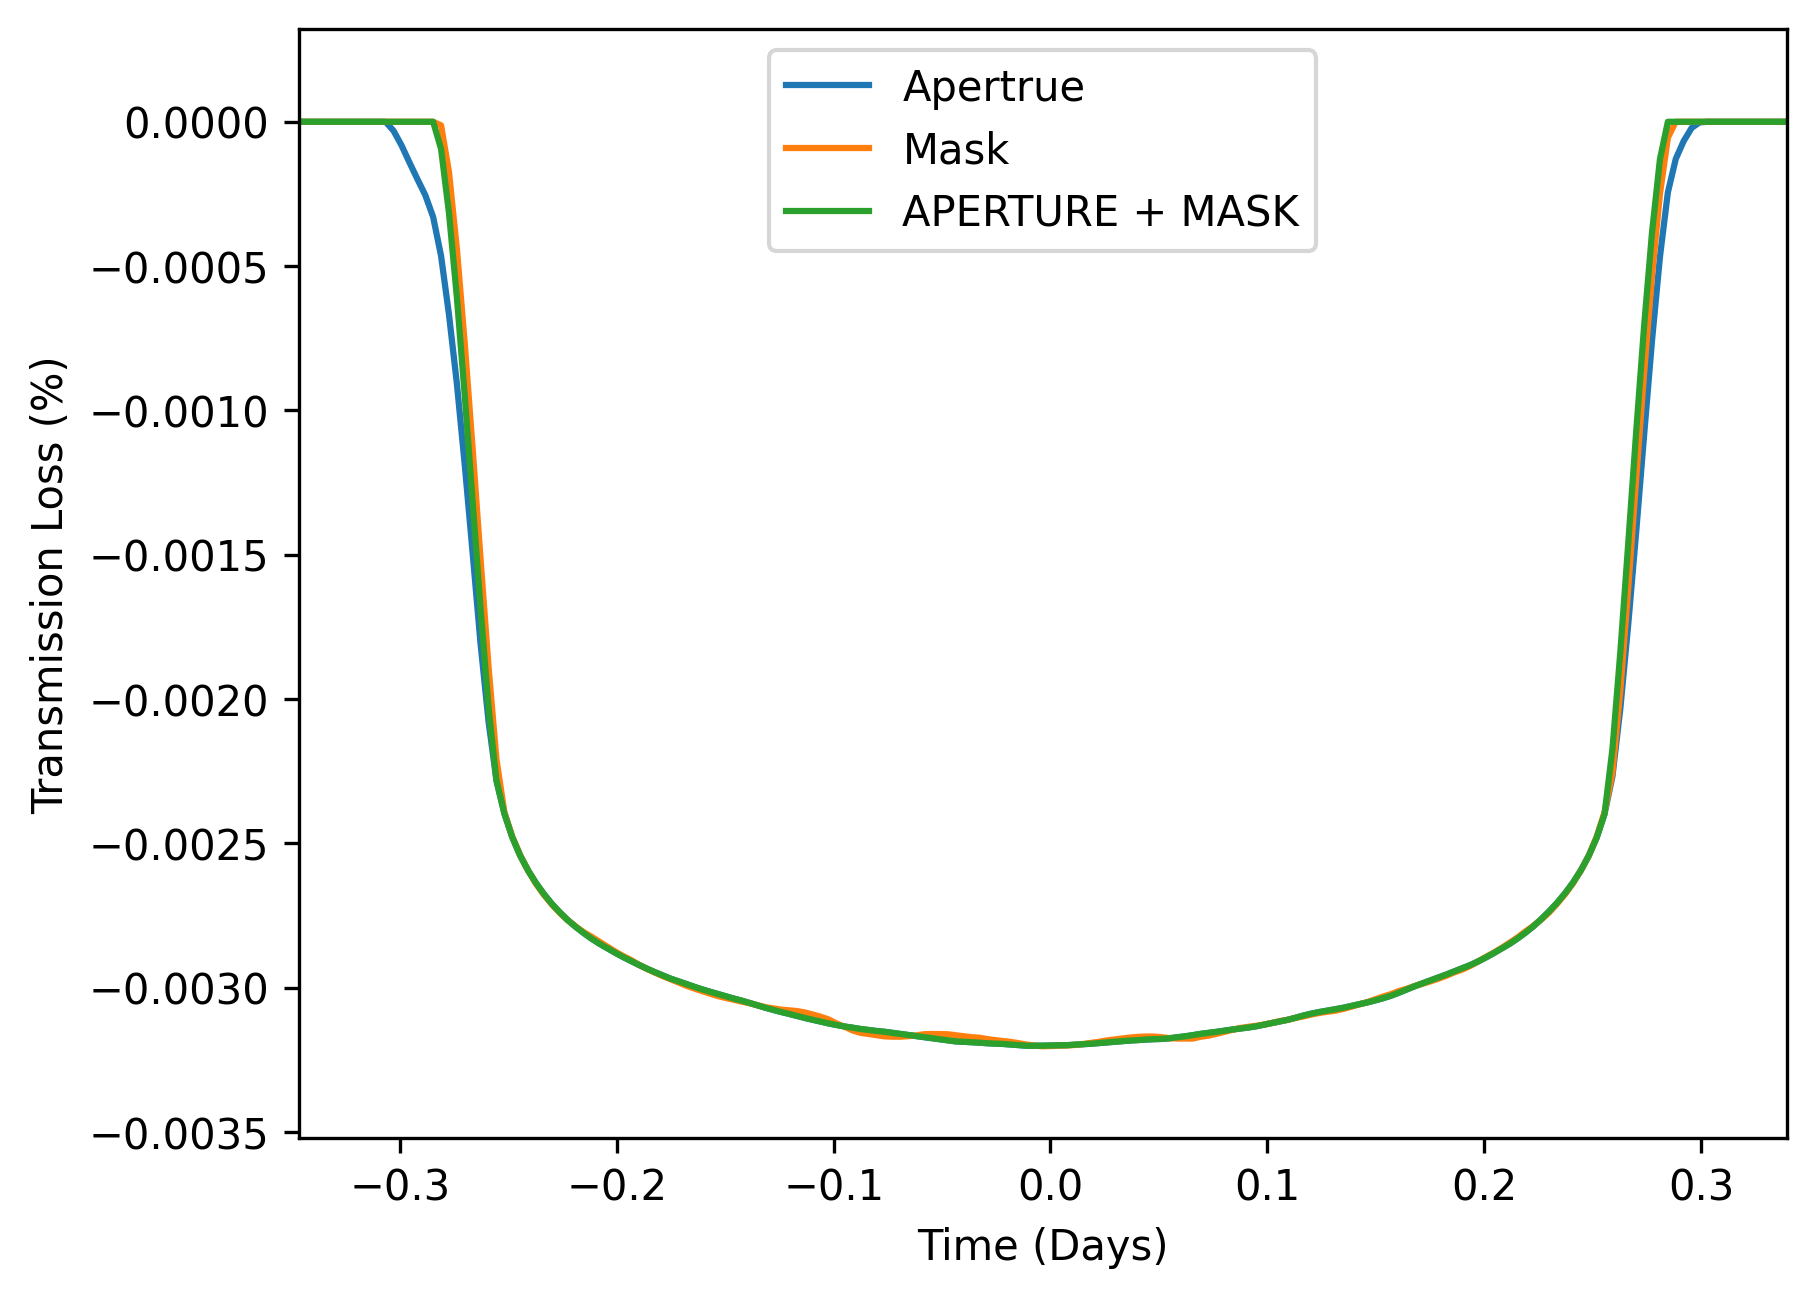

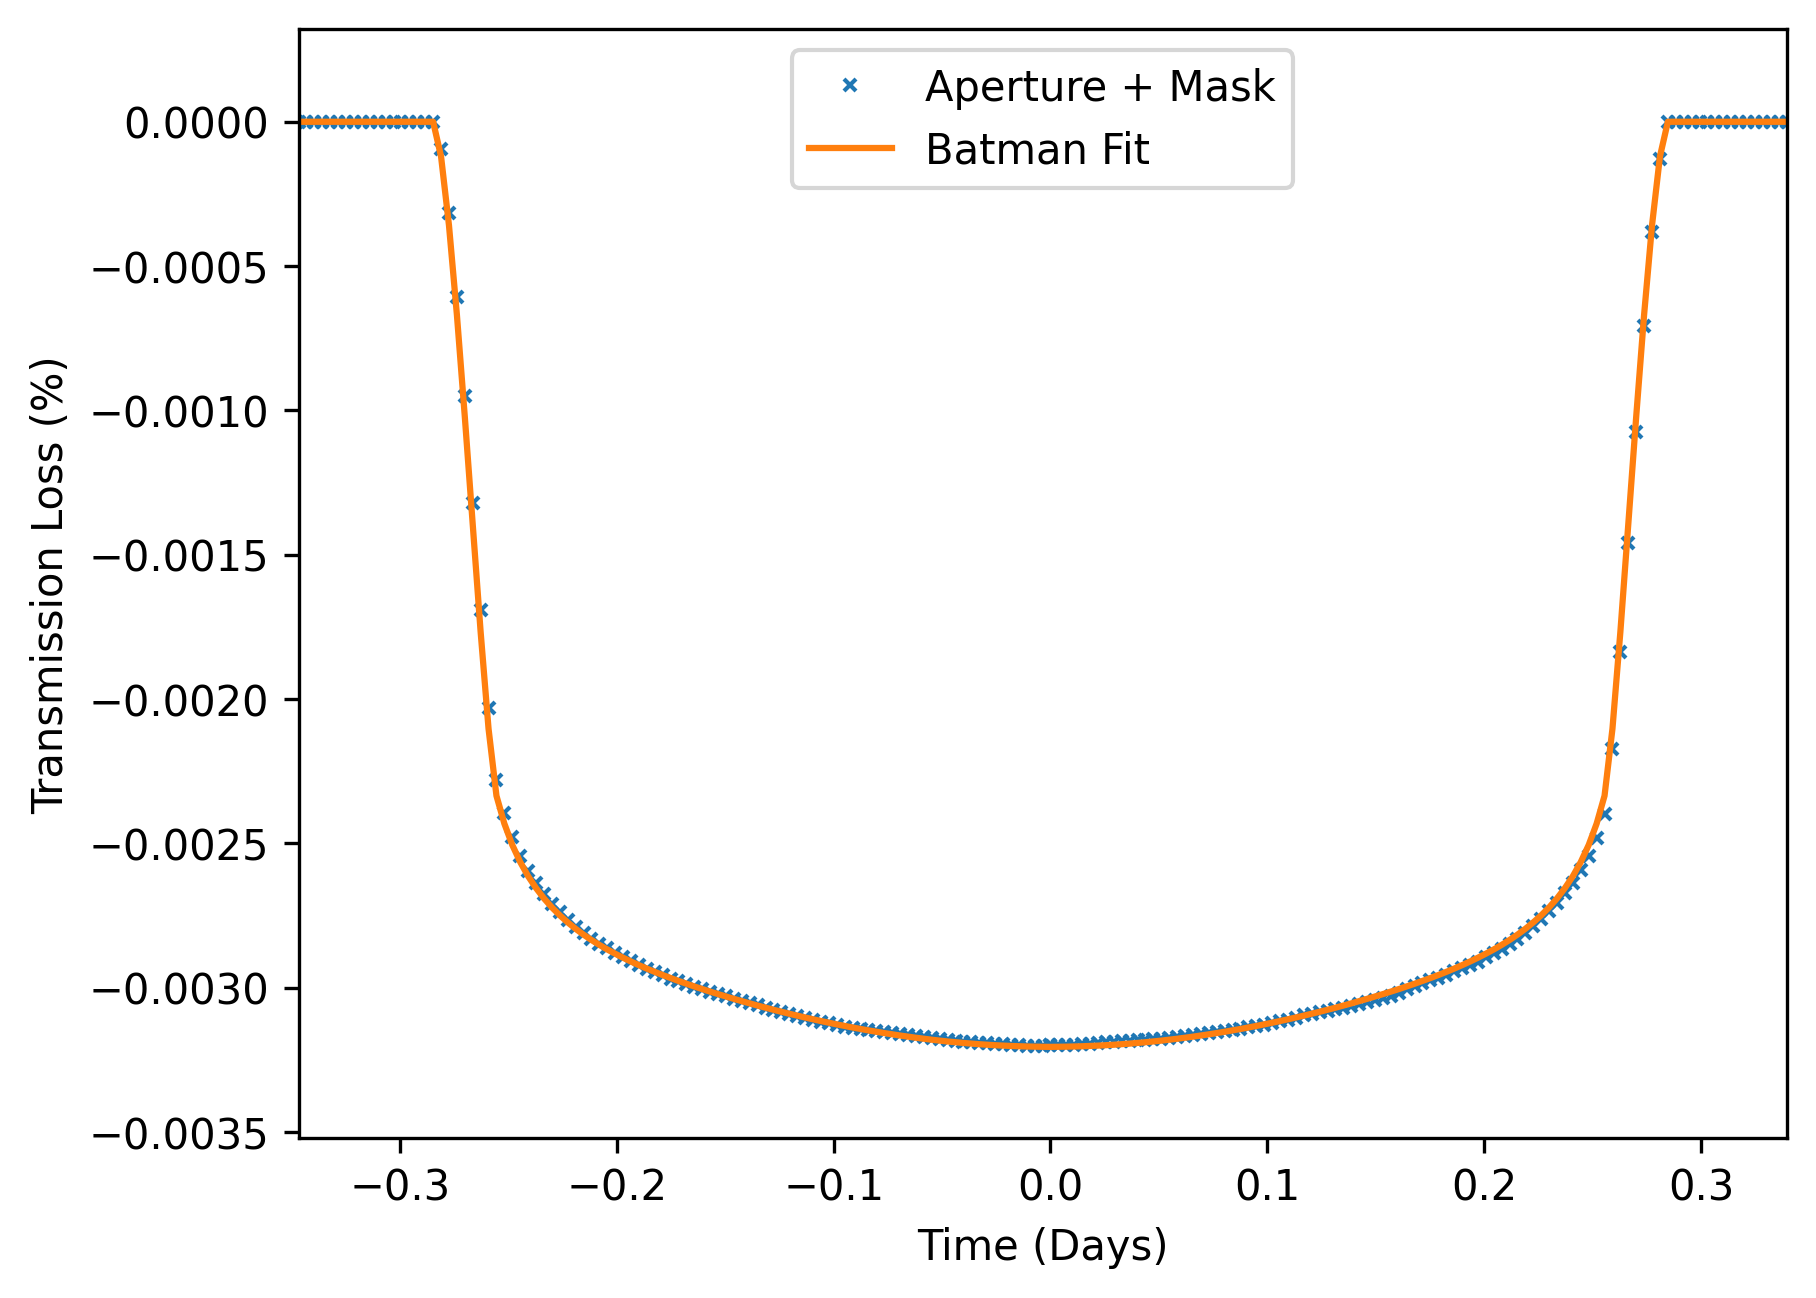

In [10]:
# Transit Simulation

import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u
from astropy.units import au
from astropy.constants import R_sun
from photutils.aperture import CircularAperture, aperture_photometry

# Step 1: Open the FITS file and load the data
fits_file = '18:07:13.fts'  # replace with your FITS file name
with fits.open(fits_file) as hdul:
    data = hdul[0].data

# Step 2: Extract the second plane (Continuum Intensity)
plane2 = data[1, :, :]  # Continuum Intensity (2D array)


# Step 2.1: Find centre and radius of Sun

from skimage import filters, measure

# Apply a threshold to segment the Sun from the background
threshold_value = filters.threshold_otsu(plane2)
binary_image = plane2 > threshold_value

# Find contours in the thresholded image
contours = measure.find_contours(binary_image, level=0.5)

# Identify the largest contour (should correspond to the Sun's disk)
largest_contour = max(contours, key=len)

# Calculate the center and radius
y_center = np.mean(largest_contour[:, 0])
x_center = np.mean(largest_contour[:, 1])
radii = np.sqrt((largest_contour[:, 0] - y_center) ** 2 + (largest_contour[:, 1] - x_center) ** 2)
radius = np.mean(radii)

# Step 3: Define the apertures
# Whole Sun aperture
sun_center = (x_center, y_center)  # example coordinates of the Sun's center
sun_radius = radius         # example radius of the Sun

# Occulting object aperture
object_center = (1000, 1000)  # example coordinates of the object's center
object_radius = 50          # exa  mple radius of the occulting object

# Create the apertures
sun_aperture = CircularAperture(sun_center, r=sun_radius)
object_aperture = CircularAperture(object_center, r=object_radius)

# Step 4: Perform aperture photometry on the Continuum Intensity plane
sun_photometry = aperture_photometry(plane2, sun_aperture)
object_photometry = aperture_photometry(plane2, object_aperture, method = 'exact')

# Extract the summed flux values
sun_flux = sun_photometry['aperture_sum'][0]
object_flux = object_photometry['aperture_sum'][0]

# Step 5: Subtract the flux of the occulting object from the total flux of the Sun
visible_flux = sun_flux - object_flux

# Display the results
print(f"Total flux of the Sun (Continuum Intensity): {sun_flux}")
print(f"Flux of the occulting object (Continuum Intensity): {object_flux}")
print(f"Visible flux after occultation (Continuum Intensity): {visible_flux}")
normalized_flux_percentage = (object_flux / sun_flux) * 100
print(f"Normalized Flux Occulted: {normalized_flux_percentage:.4f}%")

# Optional: Display the Continuum Intensity image with the apertures overlaid
plt.imshow(plane2, cmap='gray', origin='lower')
sun_aperture.plot(color='red', lw=1, alpha=0.5)
object_aperture.plot(color='blue', lw=1, alpha=0.5)
plt.title("Continuum Intensity with Apertures")
plt.colorbar()
plt.show()

# Calculate Pixel to distance ratio
MetrePerPixel = R_sun.value / radius
AUPerPixel = MetrePerPixel / au.to(u.m)
print(f"Estimate of Metres per Pixel: {MetrePerPixel:.4f}")
#%% Masking Planet and Sun

import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u
from astropy.units import au
from astropy.constants import R_sun
from photutils.aperture import CircularAperture, aperture_photometry

# Step 1: Open the FITS file and extract the data
file_path = '18:07:13.fts'
with fits.open(file_path) as hdul:
    data = hdul[0].data  # Extract the 3D data array
   
# Extract the second 2D plane from your data (Continuum Intensity)
plane2 = data[1, :, :]  # Shape (2048, 2048)

from skimage import filters, measure

# Apply a threshold to segment the Sun from the background
threshold_value = filters.threshold_otsu(plane2)
binary_image = plane2 > threshold_value

# Find contours in the thresholded image
contours = measure.find_contours(binary_image, level=0.5)

# Identify the largest contour (should correspond to the Sun's disk)
largest_contour = max(contours, key=len)

# Calculate the center and radius
y_center = np.mean(largest_contour[:, 0])
x_center = np.mean(largest_contour[:, 1])
radii = np.sqrt((largest_contour[:, 0] - y_center) ** 2 + (largest_contour[:, 1] - x_center) ** 2)
radius = np.mean(radii)

print(f"Center: ({x_center}, {y_center}), Radius: {radius}")

# Create a circular mask for the Sun's disk
ny, nx = plane2.shape  # extracts the height (ny) and width (nx) of the 2D image (plane2)
y, x = np.ogrid[:ny, :nx]  # Create  two separate arrays that correspond to the row indices (y) and column indices (x) of the image

# Create a circular mask for Sun
distance_from_center = np.sqrt((x - x_center)**2 + (y - y_center)**2)
mask = distance_from_center <= radius

# Apply the mask to the image (set background pixels to zero)
sun_region = np.where(mask, plane2, 0)

# Calculate the integrated flux of the Sun (sum of the pixels within the disk)
integrated_flux_sun = sun_region.sum()
sun_flux = integrated_flux_sun

sun_region_masked = sun_region.copy()

# Create Planet Mask

object_center = (1000, 1000)  # example coordinates of the object's center
object_radius = 50          # exa  mple radius of the occulting object

distance_from_center2 = np.sqrt((x - object_center[1])**2 + (y - object_center[0])**2)
mask2 = distance_from_center2 <= object_radius
sun_region_masked[mask2] = 0

integrated_flux_masked = sun_region_masked.sum()

# Print the result
print(f"Integrated Flux of the Sun: {integrated_flux_sun} counts")
print(f"Integrated Flux of the Sun with Dot: {integrated_flux_masked} counts")

# Step 4: Plot the modified image with the circular black dot
plt.figure(figsize=(8, 8))
plt.imshow(sun_region_masked, cmap='gray', origin='lower')
plt.colorbar(label='Continuum Intensity [counts]')
plt.xlabel('X Pixels')
plt.ylabel('Y Pixels')
plt.show()
#%% Calculate Limb Darkening Coefficients

import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.integrate import quad

def nonlinear(mu, c1, c2, c3, c4):
    return 1 - (c1 * (1 - mu**(1/2)) +
                 c2 * (1 - mu) +
                 c3 * (1 - mu**(3/2)) +
                 c4 * (1 - mu**2))

def quadratic(mu, u1, u2):
    """Quadratic limb darkening model."""
    return (1 - u1 * (1 - mu) - u2 * (1 - mu)**2)


intensity_array = sun_region
central_intensity = intensity_array[int(y_center), int(x_center)]
normalized_intensity_array = intensity_array / central_intensity


# Get the dimensions of the array
ny, nx = normalized_intensity_array.shape

# Create a grid of distances from the center
y, x = np.indices((ny, nx))
r = np.sqrt((x - x_center)**2 + (y - y_center)**2)
r_normalized = r / radius

# Mask to only include points within the Sun's disk
mask = r_normalized <= 1
 
# Average the intensity in radial bins
num_bins = 100
bins = np.linspace(0, 1, num_bins)
radial_profile = np.zeros(num_bins - 1)
radial_profile_error = np.zeros(num_bins - 1)
for i in range(num_bins - 1):
    bin_mask = (r_normalized >= bins[i]) & (r_normalized < bins[i + 1]) & mask
    bin_values = normalized_intensity_array[bin_mask]
    radial_profile[i] = np.mean(bin_values)
   
    # Calculate the standard error for the current bin
    if len(bin_values) > 0:
        radial_profile_error[i] = np.std(bin_values) / np.sqrt(len(bin_values))
    else:
        radial_profile_error[i] = 0

# Handle cases where bins might be empty (NaNs)
radial_profile = np.nan_to_num(radial_profile)

bin_centers = (bins[:-1] + bins[1:]) / 2
mu_values = np.sqrt(1 - bin_centers ** 2)
fit_quad, cov_quad = curve_fit(quadratic, mu_values, radial_profile, sigma=radial_profile_error)
fit_nonlinear, _ = curve_fit(nonlinear, mu_values, radial_profile, sigma=radial_profile_error)

print(f'Quadratic Fit: u1={fit_quad[0]:.3f}, u2={fit_quad[1]:.3f}')
print(f'Nonlinear Fit: u1={fit_nonlinear[0]:.3f}, u2={fit_nonlinear[1]:.3f}, u3={fit_nonlinear[2]:.3f}, u3={fit_nonlinear[3]:.3f}')
# Plot the results
plt.figure(dpi = 300)
plt.errorbar(mu_values, radial_profile, yerr=radial_profile_error,capsize = 2, fmt='o', ms = 2, label='Observed radial profile')
plt.plot(mu_values, nonlinear(mu_values, *fit_nonlinear), label=f'Nonlinear Fit')
plt.plot(mu_values, quadratic(mu_values, *fit_quad), label=f'Quadratic Fit')
plt.legend()
plt.xlabel('mu')
plt.ylabel('Normalized Intensity')
plt.legend()
plt.show()



#%% Orbital Sim

import numpy as np
import matplotlib.pyplot as plt
from astropy.units import au
from astropy import units as u
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def findMeanAnomaly(t, t0, P):
    return 2 * np.pi / P * (t-t0)

def f(E, M, e):
    return E - e * np.sin(E) - M

def f_prime(E, e):
    return 1 - e * np.cos(E)

def findEccentricAnomaly(M_array, e, initial_guess, tol=1e-8, max_iter=100): # through Newton method
    E_array = np.zeros_like(M_array)
    for i, M in enumerate(M_array):
        E = initial_guess[i]  
        for _ in range(max_iter):
            f_val = f(E, M, e)
            if np.abs(f_val) < tol:  
                E_array[i] = E
                break
            f_prime_val = f_prime(E, e)
            E = E - f_val / f_prime_val
        else:
            raise ValueError(f"Failed to converge for M = {M}")
    return E_array

def findTrueAnomalyDash(E, e):
    numerator = np.cos(E) - e
    denominator = 1 - e * np.cos(E)
    arg = numerator / denominator
    return np.arccos(arg)

def findTrueAnomaly(E_values, theta_prime_values):
    theta_values = np.zeros_like(E_values)  

    for i, E in enumerate(E_values):
        theta_prime = theta_prime_values[i]
   
        while E >= 2 * np.pi:  # ensures if/else conditions repreated every 2pi
            E -= 2 * np.pi

        if E <= np.pi:
            theta_values[i] = theta_prime
        elif np.pi < E < 2 * np.pi:
            theta_values[i] = 2 * np.pi - theta_prime

    return theta_values

def RadiusFromFocus(a, e, theta):
    r = (a * (1 - e**2)) / (1 + e * np.cos(theta))
    return r

def PolartoCartesian(r, theta):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

def RotatePointsAroundY(x, y, z, inclination):
    # Convert angle from degrees to radians
    anlge_between_orbitalplane_refplane = 90 - inclination
    rad = np.radians(-anlge_between_orbitalplane_refplane)
   
    # Define the rotation matrix for counter-clockwise rotation around the y-axis
    x_rotated = x * np.cos(rad) + z * np.sin(rad)
    y_rotated = y
    z_rotated = - x * np.sin(rad) + z * np.cos(rad)
   
    return x_rotated, y_rotated, z_rotated

# AU per Pixel: 4.946822969244625e-06

a = 1/ AUPerPixel # au.to(u.km) is 1 AU
e = 0.0
P = 365 # days
t = np.linspace(0,365,100000)

t0 = 0
i = 90

MeanAnomalyE = findMeanAnomaly(t,t0,P)
EccentricAnomaly = findEccentricAnomaly(MeanAnomalyE,e,MeanAnomalyE)
TrueAnomalyDashE = findTrueAnomalyDash(EccentricAnomaly, e)
TrueAnomalyE = findTrueAnomaly(EccentricAnomaly, TrueAnomalyDashE)
RadiusFromFocusE = RadiusFromFocus(a,e,TrueAnomalyE)
x_values, y_values = PolartoCartesian(RadiusFromFocusE, TrueAnomalyE)

x, y, z = RotatePointsAroundY(x_values, y_values, np.zeros_like(x_values), i)

fig = plt.figure(dpi=300)
ax = fig.add_subplot()
ax.axis('equal')
ax.plot(x_values,y_values,'.', ms = 1)
ax.plot(x,y,'.', color = 'red',ms = 1)
ax.plot(0,0,'.', color = 'orange')
ax.set_xlabel('x (Pixels)')
ax.set_ylabel('y (Pixels)')
plt.title("X-Y plane View")

fig = plt.figure(dpi=300)
ax = fig.add_subplot()
ax.axis('equal')
ax.plot(y_values,np.zeros_like(x_values),'.', ms = 1)
ax.plot(y,z,'.', color = 'red',ms = 1) # observer view
ax.plot(0,0,'.', color = 'orange')
ax.set_xlabel('z (Pixels)')
ax.set_ylabel('y (Pixels)')
plt.title("Observer View")

fig = plt.figure(dpi=300)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_values, y_values, np.zeros_like(x_values), color='blue', label='Original Points', s = 3)

# Plot the rotated points in red
ax.axis('equal')
ax.scatter(x, y, z, color='red', label='Rotated Points', s = 1)
ax.set_xlabel('x (Pixels)')
ax.set_ylabel('y (Pixels)')
ax.set_zlabel('z (Pixels)')
plt.show()

#%% Lightcurve
import pandas as pd

# x,y,z, as the positions of centre of the occulting body (in pixels)
# we took positive x axis as direction towards observer so we discard that coordinate
# Transpose y and z array such that the initial point is at centre Sun
y_transpose = y + x_center
z_transpose = z + y_center
# Create a dataframe of orbital sim
df = pd.DataFrame({
    'x (Pixels)': x,
    'y (Pixels)': y_transpose,
    'z (Pixels)': z_transpose,
    't (Days)': t
})

n = len(df)
first_quarter_end_index = int(n // 4)
last_quarter_start_index = int((3 * n) // 4)

# Filter the DataFrame for points near transit
first_quarter = df.iloc[:first_quarter_end_index][(df['y (Pixels)'] >= x_center) & (df['y (Pixels)'] < 2200)]
last_quarter = df.iloc[last_quarter_start_index:][(df['y (Pixels)'] > -200) & (df['y (Pixels)'] <= x_center)]
last_quarter['t (Days)'] = last_quarter['t (Days)'] - 365

filtered_df= pd.concat([first_quarter, last_quarter]).sort_values(by='y (Pixels)', ascending=True).reset_index(drop=True)

# Plot graph
fig, ax = plt.subplots(dpi = 300)  # Create a figure and an axis

# Display the image on the axis
im = ax.imshow(plane2, cmap='gray', origin='lower')

# Set the title
ax.set_title("Position of Transit on Stellar Disk")

# Plot Centres of occulting body
ax.plot(filtered_df['y (Pixels)'], filtered_df['z (Pixels)'], '.', ms = 1)

# Add a colorbar to the figure
fig.colorbar(im, ax=ax)

# Show the plot
plt.show()

object_fluxes = []
object_positions = list(zip(filtered_df['y (Pixels)'], filtered_df['z (Pixels)']))
object_radius = 50
integrated_fluxes_masked = []
object_fluxes_mix = []

for position in object_positions:
    # Create a circular mask for the Sun's disk
    ny, nx = plane2.shape  # extracts the height (ny) and width (nx) of the 2D image (plane2)
    y_grid, x_grid = np.ogrid[:ny, :nx]  # Create  two separate arrays that correspond to the row indices (y) and column indices (x) of the image
   
    # create mask
    sun_region_masked = sun_region.copy()
   
    distance_from_center2 = np.sqrt((x_grid - position[1])**2 + (y_grid - position[0])**2)
    mask2 = distance_from_center2 <= object_radius
    sun_region_masked[mask2] = 0

    integrated_flux_masked = sun_region_masked.sum()
    integrated_fluxes_masked.append(integrated_flux_masked)

for position in object_positions:
   
    # Create an aperture for the current object position
    object_aperture = CircularAperture(position, r=object_radius)
   
    # Perform aperture photometry for the current object
    object_photometry = aperture_photometry(sun_region_masked, object_aperture, method='exact')
   
    # Extract the summed flux value for the current object and store it in the list
    object_flux_mix = object_photometry['aperture_sum'][0]
    object_fluxes_mix.append(object_flux_mix)


# Iterate over each object position to create apertures and perform photometry
for position in object_positions:
    # Create an aperture for the current object position
    object_aperture = CircularAperture(position, r=object_radius)
   
    # Perform aperture photometry for the current object
    object_photometry = aperture_photometry(plane2, object_aperture, method = 'exact')
   
    # Extract the summed flux value for the current object and store it in the list
    object_flux = object_photometry['aperture_sum'][0]
    object_fluxes.append(object_flux)

Transmission_array = (sun_flux - object_fluxes) / sun_flux
Transmission_array_2 = -(integrated_flux_sun -integrated_fluxes_masked) / integrated_flux_sun
Transmission_array_3 = (integrated_flux_sun - object_fluxes_mix) / integrated_flux_sun

filtered_df['Transmission (%)'] = Transmission_array - 1 # APERTURE METHOD
filtered_df['Transmission (%) 2'] = Transmission_array_2 # MASK METHOD
filtered_df['Transmission (%) 3'] = Transmission_array_3 - 1  # APERTURE + MASK METHOD
# Filter df to remove NaN
filtered_df['Transmission (%)'] = filtered_df['Transmission (%)'].fillna(0)
filtered_df['Transmission (%) 3'] = filtered_df['Transmission (%) 3'].fillna(0)
transmission_range = max(filtered_df['Transmission (%)']) - min(filtered_df['Transmission (%)'])


fig = plt.figure(dpi=300)
ax = fig.add_subplot()

ax.plot(filtered_df['t (Days)'], filtered_df['Transmission (%)'], label = "Apertrue")
ax.plot(filtered_df['t (Days)'], filtered_df['Transmission (%) 2'],label = "Mask")
ax.plot(filtered_df['t (Days)'], filtered_df['Transmission (%) 3'],label = "APERTURE + MASK")

ax.set_ylabel('Transmission Loss (%)')
ax.set_xlabel('Time (Days)')
ax.legend()
ax.set_xlim(filtered_df['t (Days)'].iloc[0], filtered_df['t (Days)'].iloc[-1])
ax.set_ylim(min(filtered_df['Transmission (%)']) - transmission_range * 0.1,
            max(filtered_df['Transmission (%)']) + transmission_range * 0.1)
#%% Fitting Light Curve

import numpy as np
import batman
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Transmission and Time
Transmission = np.array(filtered_df['Transmission (%) 3']) + 1
time = np.array(filtered_df['t (Days)'])

# Define the transit model parameters
def fit_func(time, rp):
    # Create a TransitParams object
    params = batman.TransitParams()

    # Set fixed parameters
    params.t0 = t0           # Fixed time of central transit
    params.per = 365           # Fixed orbital period
    params.a = a / sun_radius  # Fixed semi-major axis / star radius
    params.inc = i          # Fixed inclination (degrees)
    params.ecc = e           # Fixed eccentricity
    params.w = 90.0        # Fixed longitude of periastron (degrees)

    # Set variable parameters
    params.rp = rp              # Variable: planet radius / star radius
    params.limb_dark = "nonlinear"  # Limb darkening model
    params.u = fit_nonlinear      # Variable: limb darkening coefficients

    # 0.9036 -0.2312 limb darkeining


    # Calculate the light curve using the parameters
    m = batman.TransitModel(params, time)    
    return m.light_curve(params)

# Provide initial guesses for the parameters
initial_rp = object_radius / sun_radius   # Initial guess for the planet radius / star radius

# Initial parameter array for curve_fit and bounds
p0 = [initial_rp]
lower_bounds = [0]
upper_bounds = [1]

fit_params, covariance = curve_fit(fit_func, time, Transmission, p0=p0, bounds=(lower_bounds, upper_bounds), maxfev=10000)

fig = plt.figure(dpi=300)
ax = fig.add_subplot()

#ax.plot(filtered_df['t (Days)'], filtered_df['Transmission (%)'], 'x', ms = 3, label = "Aperture")
#ax.plot(filtered_df['t (Days)'], filtered_df['Transmission (%) 2'], 'x', ms = 3, label = "Mask")
ax.plot(filtered_df['t (Days)'], filtered_df['Transmission (%) 3'], 'x', ms = 3, label = "Aperture + Mask")
ax.set_ylabel('Transmission Loss (%)')
ax.set_xlabel('Time (Days)')    
ax.set_xlim(filtered_df['t (Days)'].iloc[0], filtered_df['t (Days)'].iloc[-1])
ax.set_ylim(min(filtered_df['Transmission (%)']) - transmission_range *  0.1,
            max(filtered_df['Transmission (%)']) + transmission_range * 0.1)

ax.plot(time, fit_func(time, *fit_params)-1, label = "Batman Fit")
ax.legend()

transit_depth = fit_params[0] ** 2 * 100

print(f"Original Rp /Rs: {object_radius / sun_radius:.9f}")
print(f"Fitted Rp /Rs: {fit_params[0]:.9f}")
print(f"Transit Depth: {transit_depth:.4f}%")
formatted_coeffs = ', '.join([f'{coeff:.4f}' for coeff in fit_params[1:]])
print(f"Limb Darkening Coefficients: {formatted_coeffs}")